# Data Analysis of iTunes Podcast Reviews

> _In this project, we analyze a vast dataset comprising 2 million iTunes podcast reviews spanning 100,000 unique podcasts, with monthly updates. Our investigation involves rigorous exploratory data analysis, robust statistical testing, and the development of a powerful machine learning model leveraging Google's BERT framework._
>
> _This project seeks to provide valuable insights into the analysis of textual feedback and review data, offering a rich resource for understanding the evolving landscape of podcast reviews and user sentiments._

In [16]:
# ITUNES PODCAST REVIEWS
# ----------------------------------------------------------------------------------------------------------------


# INITIATION ------------

# System information
import os

# Data preparation
import pandas as pd
import sqlite3 as sql
# import duckdb

# Data visualization
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.image as mpimg
import seaborn as sns


# Data transformation & algorithms
import numpy as np
import scipy as sp

# Data modeling
import sklearn
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score


# Miscellaneous
import math
from tabulate import tabulate
from wordcloud import WordCloud
from processes import \
    preparation, \
    transformation, \
    cleaning, \
    visualization, \
    modeling

print(
    'CURRENT DIRECTORY:\n'
    '. = \"', os.getcwd(), '\"', sep=''
)

for dirName, _, filenames in os.walk('.'):
    if dirName[2:3] != '.' and '__pycache__' not in dirName:
        if dirName in ('.\\bert', ):
            print(f'\n{dirName}\n...', sep='')
        elif dirName[:6] != '.\\bert':
            print('\n', dirName, sep='')
            for filename in filenames:
                print(os.path.join(dirName, filename))


CURRENT DIRECTORY:
. = "D:\Documents\Projects\DS\Turing\2 Data Analysis\S2\Project"

.
.\.gitignore
.\225.ipynb
.\identifier.sqlite
.\iTunesPodcastReviews_DA - Copy.ipynb
.\iTunesPodcastReviews_DA.ipynb
.\LICENSE
.\README.md
.\requirements.txt

.\bert
...

.\data
.\data\Categories.xlsx
.\data\database.sqlite
.\data\Podcasts.xlsx
.\data\Reviews - Copy.xlsx
.\data\Reviews.xlsx
.\data\Reviews_0.xlsx

.\plots
.\plots\cloud_1.png
.\plots\cloud_2.png
.\plots\cloud_3.png
.\plots\cloud_4.png
.\plots\cloud_5.png
.\plots\cloud_6.png

.\processes
.\processes\cleaning.py
.\processes\modeling.py
.\processes\preparation.py
.\processes\transformation.py
.\processes\visualization.py

.\processes\tools
.\processes\tools\modify_cls.py


## Data Familiarization
This section provides an overview of the three datasets used in this project: Categories, Podcasts, and Reviews.

In [17]:
# EXECUTION -------------

# Display plots directly in the notebook interface
%matplotlib inline

# Connect to database
con = sql.connect('./data/database.sqlite')


### Categories data:
The Categories dataset contains information about podcast categories, including the unique identifier for each podcast (podcast_id) and the category it belongs to.

In [18]:
# Import Categories data into pandas
Categories = pd.read_sql('SELECT * FROM categories', con)

# First 10 observations
print('CATEGORIES')
Categories.recap(n_rows=10)


CATEGORIES
Number of Observations: 212372; 
Number of Features: 2.
- Categorical features: podcast_id, category; 
- Numerical features: .


,podcast_id,category
0,c61aa81c9b929a66f0c1db6cbe5d8548,arts
1,c61aa81c9b929a66f0c1db6cbe5d8548,arts-performing-arts
2,c61aa81c9b929a66f0c1db6cbe5d8548,music
3,ad4f2bf69c72b8db75978423c25f379e,arts
4,ad4f2bf69c72b8db75978423c25f379e,arts-design
5,ad4f2bf69c72b8db75978423c25f379e,education
6,ad4f2bf69c72b8db75978423c25f379e,society-culture
7,f2970432aad718a000ebac10e48ae6b0,arts
8,f2970432aad718a000ebac10e48ae6b0,arts-performing-arts
9,f2970432aad718a000ebac10e48ae6b0,society-culture


### Podcasts data:
The Podcasts dataset provides details about individual podcasts, such as their identifiers (podcast_id), slugs, iTunes URLs, and titles. The itunes_id is also included as a numerical identifier.

In [19]:
# Import Podcasts data into pandas
Podcasts = pd.read_sql('SELECT * FROM podcasts', con)

# First 10 observations
print('PODCASTS')
Podcasts.recap(n_rows=10)


PODCASTS
Number of Observations: 110024; 
Number of Features: 5.
- Categorical features: podcast_id, slug, itunes_url, title; 
- Numerical features: itunes_id.


,podcast_id,itunes_id,slug,itunes_url,title
0,a00018b54eb342567c94dacfb2a3e504,1313466221,scaling-global,https://podcasts.apple.com/us/podcast/scaling-...,Scaling Global
1,a00043d34e734b09246d17dc5d56f63c,158973461,cornerstone-baptist-church-of-orlando,https://podcasts.apple.com/us/podcast/cornerst...,Cornerstone Baptist Church of Orlando
2,a0004b1ef445af9dc84dad1e7821b1e3,139076942,mystery-dancing-in-the-dark,https://podcasts.apple.com/us/podcast/mystery-...,Mystery: Dancing in the Dark
3,a00071f9aaae9ac725c3a586701abf4d,1332508972,kts-money-matters,https://podcasts.apple.com/us/podcast/kts-mone...,KTs Money Matters
4,a000a500f06555f81220c3eb641aded7,1544900779,word-on-the-street-w-dreak-swift,https://podcasts.apple.com/us/podcast/word-on-...,Word on the Street w/ Dreak Swift
5,a000aa69852b276565c4f5eb9cdd999b,1342447811,speedway-soccer,https://podcasts.apple.com/us/podcast/speedway...,Speedway Soccer
6,a000b6538cca860a11a94607c13e9595,1568973037,showing-up-for-you,https://podcasts.apple.com/us/podcast/showing-...,Showing Up for You
7,a0010b283ba17d282c7bb1f9709f0ac3,1285218356,bethany-baptist-church-bellflower-ca,https://podcasts.apple.com/us/podcast/bethany-...,"Bethany Baptist Church, Bellflower CA"
8,a0013c50c1e6b24266fdeb10eed6eea7,1448380200,mindful-communication-podcast,https://podcasts.apple.com/us/podcast/mindful-...,Mindful Communication Podcast
9,a00155a1dc1d1b9ef4d2d573982207c6,1500634531,marvels,https://podcasts.apple.com/us/podcast/marvels/...,MARVELS


### Reviews data:
The Reviews dataset contains extensive information about podcast reviews. It includes details such as the podcast identifier (podcast_id), review titles, review content, author identifiers (author_id), review creation timestamps (created_at), and user ratings (rating).

In [20]:
# Import Reviews data into pandas
Reviews = pd.read_sql('SELECT * FROM reviews', con)

# First 10 observations
print('REVIEWS')
Reviews.recap(n_rows=10)


REVIEWS
Number of Observations: 2067529; 
Number of Features: 6.
- Categorical features: podcast_id, title, content, author_id, created_at; 
- Numerical features: rating.


,podcast_id,title,content,rating,author_id,created_at
0,c61aa81c9b929a66f0c1db6cbe5d8548,really interesting!,Thanks for providing these insights. Really e...,5,F7E5A318989779D,2018-04-24T12:05:16-07:00
1,c61aa81c9b929a66f0c1db6cbe5d8548,Must listen for anyone interested in the arts!!!,Super excited to see this podcast grow. So man...,5,F6BF5472689BD12,2018-05-09T18:14:32-07:00
2,ad4f2bf69c72b8db75978423c25f379e,nauseatingly left,"I'm a liberal myself, but its pretty obvious a...",1,1AB95B8E6E1309E,2019-06-11T14:53:39-07:00
3,ad4f2bf69c72b8db75978423c25f379e,Diverse stories,I find Tedx talks very inspirational but I oft...,5,11BB760AA5DEBD1,2018-05-31T13:08:09-07:00
4,ad4f2bf69c72b8db75978423c25f379e,👍👍👍👍,"I love this podcast, it is so good.",5,D86032C8E57D15A,2019-06-19T13:56:05-07:00
5,ad4f2bf69c72b8db75978423c25f379e,Waste of time,I listened to the “Spanish Flu” pod cast. Afte...,1,67A452C80BCBEEC,2019-01-09T09:07:09-07:00
6,ad4f2bf69c72b8db75978423c25f379e,Too much victimology,Too much BS trying to convince me of how racis...,3,265ADD6AB150C41,2019-02-02T10:15:25-07:00
7,ad4f2bf69c72b8db75978423c25f379e,Politically biased,I would love to hear topics discussed without ...,1,C27BC8C2D6F5A4A,2019-01-01T09:47:11-07:00
8,ad4f2bf69c72b8db75978423c25f379e,😀😃,Ok so I am in love with this podcast.,5,218EE494C8C787F,2019-05-09T17:50:14-07:00
9,ad4f2bf69c72b8db75978423c25f379e,Volume???,"Great podcast, but the editors turn the volume...",1,DC6DBB8C4D9B2E5,2019-06-25T05:05:24-07:00


These datasets form the foundation of our analysis, enabling us to explore and gain insights into podcast-related data.

## Data Preparation
This section plays a pivotal role in ensuring the integrity and usability of the datasets. This phase comprises three key components: data cleaning, updating the Categories, Podcasts, and Reviews datasets, and thorough outlier checks. Each of these steps is crucial to laying a robust foundation for subsequent data analysis.

### Data cleaning:
Data cleaning is the initial step in our data preparation process. It involves identifying and addressing various data quality issues that might compromise the accuracy and reliability of our analysis. These issues can range from missing values, duplicates, and inconsistent formatting to outliers and erroneous entries. By meticulously cleaning the data, we ensure that it is fit for analysis, minimizing the risk of drawing incorrect conclusions due to data imperfections.

First, any observations with erroneous values that are in unsuitable formats or missing values will be handled.

In [21]:
# HANDLING ERRONEOUS VALUES

# Cleaning the dataset
print('CATEGORIES')
if Categories.has_nan() or Categories.has_na():
    ## Observations with erroneous non-numeric data are removed;
    Categories.dropna(subset=''.split(', '), inplace=True)

    ## Due to limited number of observations, invalid numeric data are replaced with the variables' medians
    Categories.fillna(Categories.median(numeric_only=True, skipna=True), inplace=True)

print('\nPODCASTS')
if Podcasts.has_nan() or Podcasts.has_na():
    ## Observations with erroneous non-numeric data are removed;
    Podcasts.dropna(subset=''.split(', '), inplace=True)

    ## Due to limited number of observations, invalid numeric data are replaced with the variables' medians
    Podcasts.fillna(value=Podcasts.median(numeric_only=True, skipna=True), inplace=True)

print('\nREVIEWS')
if Reviews.has_nan() or Reviews.has_na():
    ## Observations with erroneous non-numeric data are removed;
    Reviews.dropna(subset=''.split(', '), inplace=True)

    ## Due to limited number of observations, invalid numeric data are replaced with the variables' medians
    Reviews.fillna(value=Reviews.median(numeric_only=True, skipna=True), inplace=True)

print('\n# All datasets no longer contain unrepresentable or missing data.')


CATEGORIES
Invalid values not found.
Missing values not found.

PODCASTS
Invalid values not found.
Missing values not found.

REVIEWS
Invalid values not found.
Missing values not found.

# All datasets no longer contain unrepresentable or missing data.


Second, any duplicate samples and features based on the podcasts' IDs will be investigated further from the three datasets to understand the reasons behind these duplicates and to avoid redundancy and bias.

In [22]:
# REMOVING DUPLICATE SAMPLES & FEATURES

# Remove duplicated IDs
print('CATEGORIES')
ifDup_c = Categories.has_duplicates('podcast_id', rm=False)

print('\nPODCASTS')
ifDup_p = Podcasts.has_duplicates('podcast_id', rm=False)

print('\nREVIEWS')
ifDup_r = Reviews.has_duplicates('podcast_id', rm=False)


CATEGORIES
Duplicates in Podcast_id found.
- No. Unique Values: 110024
- Duplicated Values: c61aa81c9b929a66f0c1db6cbe5d8548, c61aa81c9b929a66f0c1db6cbe5d8548, ad4f2bf69c72b8db75978423c25f379e, ad4f2bf69c72b8db75978423c25f379e, ad4f2bf69c72b8db75978423c25f379e, f2970432aad718a000ebac10e48ae6b0, f2970432aad718a000ebac10e48ae6b0, f90b974d49b86b2d4d1769519fb478c0, f90b974d49b86b2d4d1769519fb478c0, f90b974d49b86b2d4d1769519fb478c0, ...

PODCASTS
Duplicated IDs not found.

REVIEWS
Duplicates in Podcast_id found.
- No. Unique Values: 111544
- Duplicated Values: c61aa81c9b929a66f0c1db6cbe5d8548, ad4f2bf69c72b8db75978423c25f379e, ad4f2bf69c72b8db75978423c25f379e, ad4f2bf69c72b8db75978423c25f379e, ad4f2bf69c72b8db75978423c25f379e, ad4f2bf69c72b8db75978423c25f379e, ad4f2bf69c72b8db75978423c25f379e, ad4f2bf69c72b8db75978423c25f379e, ad4f2bf69c72b8db75978423c25f379e, ad4f2bf69c72b8db75978423c25f379e, ...


In [23]:
print(
    f"Number of distinct podcasts in data: "
    f"{pd.concat([Categories['podcast_id'], Podcasts['podcast_id'], Reviews['podcast_id']]).nunique()}\n"
    f"- Categories: {Categories['podcast_id'].nunique()}\n"
    f"- Podcasts: {Podcasts['podcast_id'].nunique()}\n"
    f"- Reviews: {Reviews['podcast_id'].nunique()}"
)


Number of distinct podcasts in data: 111544
- Categories: 110024
- Podcasts: 110024
- Reviews: 111544


### Updating the Categories, Podcasts, & Reviews datasets:
The datasets, namely Categories, Podcasts, and Reviews, undergo updates as part of our data preparation efforts.
The updated datasets are also stored separately in the SQLite server in order to reserve the original data.

Only the relevant data (e.g., `podcast_id`, `rating`, `created_at`) are retained in the updated datasets for more
efficient upcoming data analysis. Furthermore, the `podcast_id` variable is also simplified into an order of 1 to
110024.

In [24]:
# Map of podcast IDs in Python
id_old = Podcasts['podcast_id'].unique()
podcast_id = dict(zip(id_old, range(1, Podcasts['podcast_id'].nunique() + 1)))

con.execute(
    """
    DROP TABLE IF EXISTS Map
    ;
    """
)

# Map of podcast IDs in SQL
con.execute(
    """
    CREATE TABLE Map AS
    SELECT podcast_id AS id_old, ROW_NUMBER() OVER () AS podcast_id
    FROM Podcasts
    ;
    """
)

con.execute(
    """
    CREATE UNIQUE INDEX id_old
    ON Map (id_old)
    ;
    """
)

Map = pd.read_sql(
    """
    SELECT *
    FROM Map
    LIMIT 10
    ;
    """,
    con,
    index_col='id_old'
)

print('NEW ID')
Map.recap(n_rows=10)


NEW ID
Number of Observations: 10; 
Number of Features: 1.
- Categorical features: ; 
- Numerical features: podcast_id.


,podcast_id
id_old,
a00018b54eb342567c94dacfb2a3e504,1
a00043d34e734b09246d17dc5d56f63c,2
a0004b1ef445af9dc84dad1e7821b1e3,3
a00071f9aaae9ac725c3a586701abf4d,4
a000a500f06555f81220c3eb641aded7,5
a000aa69852b276565c4f5eb9cdd999b,6
a000b6538cca860a11a94607c13e9595,7
a0010b283ba17d282c7bb1f9709f0ac3,8
a0013c50c1e6b24266fdeb10eed6eea7,9


In [25]:
con.execute(
    """
    -- Remove old updated Categories dataset
    DROP TABLE IF EXISTS Categories_updated;
    """
)

con.execute(
    """
    CREATE TABLE Categories_updated AS
    SELECT Map.podcast_id, Categories.category
    FROM Map, Categories
    WHERE Categories.podcast_id = Map.id_old
    """
)

Categories = pd.read_sql("SELECT * FROM Categories_updated", con)

print('UPDATED CATEGORIES')
Categories.recap(n_rows=10)


UPDATED CATEGORIES
Number of Observations: 212372; 
Number of Features: 2.
- Categorical features: category; 
- Numerical features: podcast_id.


,podcast_id,category
0,43693,arts
1,43693,arts-performing-arts
2,43693,music
3,15262,arts
4,15262,arts-design
5,15262,education
6,15262,society-culture
7,94740,arts
8,94740,arts-performing-arts
9,94740,society-culture


In [26]:
con.execute(
    """
    -- Remove old updated Podcasts dataset
    DROP TABLE IF EXISTS Podcasts_updated;
    """
)

con.execute(
    """
    CREATE TABLE Podcasts_updated AS
    SELECT Map.podcast_id, Podcasts.title
    FROM Map, Podcasts
    WHERE Podcasts.podcast_id = Map.id_old
    """
)

con.execute(
    """
    CREATE UNIQUE INDEX podcast_id
    ON Podcasts_updated (podcast_id);
    """
)

Podcasts = pd.read_sql("SELECT * FROM Podcasts_updated", con, index_col='podcast_id')

print('UPDATED PODCASTS')
Podcasts.recap(n_rows=10)


UPDATED PODCASTS
Number of Observations: 110024; 
Number of Features: 1.
- Categorical features: title; 
- Numerical features: .


,title
podcast_id,
1,Scaling Global
2,Cornerstone Baptist Church of Orlando
3,Mystery: Dancing in the Dark
4,KTs Money Matters
5,Word on the Street w/ Dreak Swift
6,Speedway Soccer
7,Showing Up for You
8,"Bethany Baptist Church, Bellflower CA"
9,Mindful Communication Podcast


In [27]:
Reviews = Reviews.copy()[Reviews['podcast_id'].isin(id_old)]
Reviews['podcast_id'] = Reviews['podcast_id'].map(podcast_id)

Reviews.to_sql('Reviews_updated', con, if_exists='replace', index=False)

Reviews['created_at'] = pd.to_datetime(Reviews['created_at'])

# Reorder reviews based on ids and date created
Reviews.sort_values(by=['podcast_id', 'created_at'], inplace=True)

print('UPDATED REVIEWS')
Reviews.recap(n_rows=10)


UPDATED REVIEWS
Number of Observations: 2043297; 
Number of Features: 6.
- Categorical features: title, content, author_id; 
- Numerical features: podcast_id, rating.


,podcast_id,title,content,rating,author_id,created_at
604710,1,Very informative,Great variety of speakers!,5,CC47C85896D423B,2017-11-29 12:16:43-07:00
604711,2,Good Sernons,I'm a regular listener. I only wish that the ...,5,103CC9DA2046218,2019-10-08 04:23:32-07:00
604712,3,Weird,Thts so weird... However made tht is weird. Du...,1,9D7AB51348639C7,2011-09-06 14:11:08-07:00
99854,4,"Great show, great advice","So excited to have this come to reality, well ...",5,37E4CA7C4E15D4C,2018-01-16 18:57:38-07:00
99853,4,Very Insightful!,Really enjoy this podcast! Quick and to the po...,5,19387A136DD3305,2018-01-18 21:59:11-07:00
99856,4,Inspiration & Information,Inspiration & Information that transforms busi...,5,DA98C96DE6A9629,2018-05-11 18:40:15-07:00
99855,4,Love your show!,"Hi KT, I love listening to your show and I hav...",5,752FA4C3B648001,2018-11-24 17:06:55-07:00
2007618,5,All in one,Word on the Street w/ Dreak Swift is one of th...,5,5B06340911B0B24,2021-05-10 11:27:43-07:00
2007619,5,100 best podcast,"Best podcast ever, don’t want to miss out plus...",5,A2E8CD662BD263F,2021-07-06 13:57:57-07:00
568839,6,Independent Nashville Soccer Content,Independent Nashville Soccer Content.,5,F0B119E5348C41C,2018-01-31 21:09:40-07:00


### Checking outliers:
Outliers are data points that significantly deviate from the norm and can have a substantial impact on statistical analyses and machine learning models. As part of our data preparation process, we conduct a comprehensive outlier check to identify and assess any potential outliers within the datasets.

This step is particularly crucial when working with numerical features, such as ratings, where extreme values can skew results. Detecting and managing outliers ensures that our subsequent analyses are robust and not unduly influenced by extreme observations.

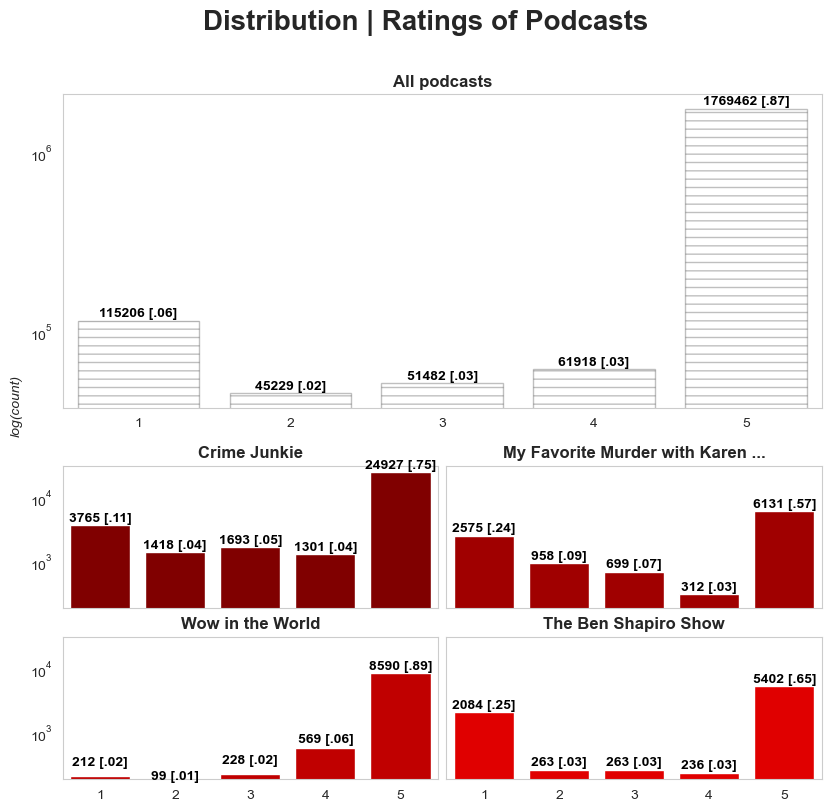

In [28]:
# Select Reviews data of the 4 most rated podcasts
podcasts_top4 = Reviews['podcast_id'].value_counts()[:4].index
Reviews_top4 = Reviews[Reviews['podcast_id'].isin(podcasts_top4)]

# Create a figure with 2 subfigures
figure = plt.figure(layout='constrained', figsize=(8, 8))
subfigures = figure.subfigures(2, 1)
colors = [
    '#800000', '#A00000', '#C00000', '#E00000',
    '#FF0000', '#FF3333', '#FF6666', '#FF9999',
    '#FFCCCC', '#FFDDDD'
]
# Create 1 big subplot in first subfigure
axes_top = subfigures[0].subplots(1, 1)

mpl.rcParams['hatch.linewidth'] = 1
counts = np.bincount(Reviews['rating'])[1:]

for bar in axes_top.bar(
        np.arange(len(counts)) + 1,
        counts,
        color='none',
        hatch='--',
        edgecolor='black',
        alpha=.25
):
    height = bar.get_height()
    axes_top.text(bar.get_x() + bar.get_width()/2, 1.18*height,
                  f'{int(height)} [{str(round(int(height)/len(Reviews), 2))[1:]}]',
                  ha='center', va='top', color='black', fontweight='bold')

# Adjust layout and title
axes_top.set_title('All podcasts', fontweight='bold')
axes_top.set_yscale('log')
axes_top.set_xlim(0.5, 5.5)
axes_top.grid(visible=False)

# Create 4 small subplots in second subfigure
axes_bottom = subfigures[1].subplots(2, 2, sharey=True)
axes_bottom = np.array(axes_bottom).flatten()

for (n, ax), pod in zip(enumerate(axes_bottom), podcasts_top4):
    data = Reviews_top4['rating'][Reviews_top4['podcast_id'] == pod]
    counts = np.bincount(data)[1:]
    for bar in ax.bar(
        np.arange(len(counts)) + 1,
        counts,
        color=colors[n],
        alpha=1
    ):
        height = bar.get_height()
        if n == 2:
            ax.text(bar.get_x() + bar.get_width()/2, 100 + 1.55*height,
                    f'{int(height)} [{str(round(int(height)/len(data), 2))[1:]}]',
                    ha='center', va='top', color='black', fontweight='bold')
        else:
            ax.text(bar.get_x() + bar.get_width()/2, 1.6*height,
                    f'{int(height)} [{str(round(int(height)/len(data), 2))[1:]}]',
                    ha='center', va='top', color='black', fontweight='bold')

    title = Podcasts.loc[pod]['title']
    # print(f'Distribution of podcast {title}')
    # for i in range(len(counts)):
    #     print(f'{i + 1}: {counts[i]} ({round(counts[i]/len(data)*100)}%)')
    ax.set_title(title if len(title) < 30 else f'{title[:30]}...', fontsize=12, fontweight='bold')
    if n < 2:
        ax.set_xticklabels([])
    if not n%2:
        ax.set_yticklabels([])
    ax.set_yscale('log')
    ax.set_xlim(0.5, 5.5)
    ax.grid(visible=False)

# Adjust layout and title
figure.text(-.02, .5, 'log(count)', va='center', rotation='vertical', style='italic')
figure.suptitle(
    'Distribution | Ratings of Podcasts\n',
    fontsize=20,
    fontweight='bold'
)
figure.subplots_adjust(hspace=0.2, wspace=0.2)

# Display the plot
plt.show()


In the analysis of the distribution of ratings for podcasts, both in the entire dataset and for the top four most
reviewed podcasts, we observe the following statistical results:

**Distribution in All Data:**
- The distribution of ratings in the entire dataset shows a notable bias towards high ratings (4 and 5 stars),
which together account for a significant 90% of the total ratings. This suggests a positive bias in user reviews,
indicating that a large proportion of reviews are highly favorable. The distribution is bimodal, with the highest
concentration in both lowest and highest ratings (highest), indicating the prevalence of extreme ratings.

**Distribution of Podcast "Crime Junkie":**
- For the podcast "Crime Junkie," we see a more balanced distribution of ratings compared to the overall dataset.
While 75% of the ratings are still 5 stars, there is a more significant presence of lower ratings (1 to 4 stars). This suggests that "Pabscast" has received a broader range of reviews, including both positive and negative feedback.

**Distribution of Podcast "My Favorite Murder with Karen Kilgariff and Georgia Hardstark":**
- The distribution is heavily skewed towards lower ratings, with 57% of the ratings being 5
stars. This suggests that while the podcast has a substantial number of positive reviews, it also attracts a notable number of lower ratings, potentially indicating a polarizing content or audience.

**Distribution of Podcast "Wow in the World":**
- This podcast also has a heavily skewed distribution towards 5-star ratings, with 89% of ratings falling in this
category. This suggests overwhelmingly positive feedback for this podcast.

**Distribution of Podcast "The Ben Shapiro Show":**
- "The Ben Shapiro Show" exhibits a more balanced distribution compared to some other podcasts. While it has a
significant proportion of 5-star ratings, there is also a substantial number of lower ratings, indicating a mix of positive and negative feedback.

In summary, the analysis of rating distributions reveals varying degrees of skewness and bias in user reviews across different podcasts. Understanding these distributions is essential for interpreting the sentiment and overall reception of podcasts within the dataset. It's important to consider the context and characteristics of each podcast when assessing the significance of these ratings.

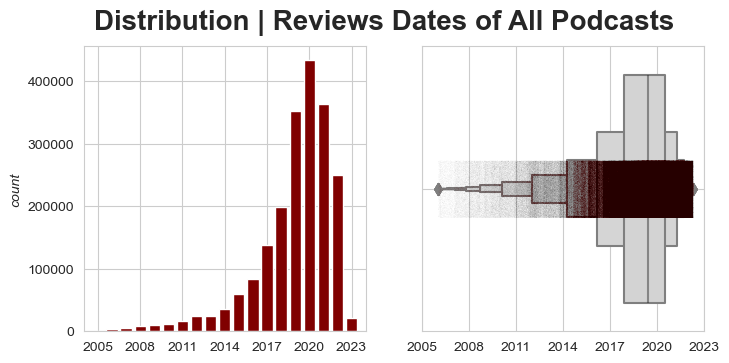

In [29]:
# Obtain the year data for each review
data = Reviews['created_at'].dt.year

# Create a figure with subplots
figure, axes = plt.subplots(
    ncols=2,
    nrows=1,
    dpi=100,
    figsize=(8, 3.7)
)

axes = np.array(axes).flatten()

# Add barchart of time created
counts = data.value_counts()  #.sort_index()
# indices = list(counts.index)
# for i in range(len(counts)):
#     print(f'{indices[i]}: {counts[indices[i]]} ({round(counts[indices[i]]/len(data)*100)}%)')

for bar in axes[0].bar(
        counts.index,
        counts,
        color=colors[0],
        alpha=1
):
    pass

axes[0].set_xticks(range(2005, 2024, 3))
axes[0].set_xticklabels(range(2005, 2024, 3))
axes[0].set_ylabel('count', style='italic')
axes[0].set_xlim(2004, 2024)
axes[0].grid(visible=True)

# Add letter-value plot of time created
data = Reviews['created_at'].values.astype(float)/10**18

sns.boxenplot(
    data,
    ax=axes[1],
    color='lightgray', orient='h'
)
sns.stripplot(data=data, size=.1, color='maroon', alpha=0.2, ax=axes[1], orient='h')

axes[1].set_xticklabels(range(2005, 2026, 3))
axes[1].set_xlabel('')
axes[1].set_xlim(1.1, 1.7)
axes[1].set_yticklabels([])
axes[1].grid(visible=True)

# Adjust layout and title
figure.suptitle(
    'Distribution | Reviews Dates of All Podcasts\n',
    fontsize=20,
    fontweight='bold'
)
figure.subplots_adjust(hspace=0.2, wspace=0.2)

# Display the plot
plt.show()


Key observations and insights from the distribution of review creation times:
1. **Temporal Trend:** The distribution demonstrates a clear temporal trend, with a notable increase in the number of
reviews from 2005 to 2023. This indicates a growing interest in podcasts over time.

2. **Distribution Shape:** The distribution of review creation times shows an upward trend over the years, with a
noticeable increase in the number of reviews from 2014 onwards. This indicates a growth in the number of reviews submitted in recent years.

3. **Skewness:** The distribution is negatively skewed, with a longer left tail. This means that the majority of
reviews are concentrated in the more recent years (2018, 2019, 2020, 2021) while the earlier years have fewer reviews. The skewness suggests a temporal bias towards more recent reviews.

4. **Peak Years:** The years 2018, 2019, 2020, and 2021 stand out as peak years for review submissions, collectively
accounting for approximately 66% of all reviews. This concentration of reviews in recent years is indicative of a surge in podcast review activity during that period.

5. **Long Tail:** The distribution exhibits a long tail towards earlier years (2005-2013) and later years
(2022-2023), where the number of reviews is relatively low. This suggests that reviews from these years are less frequent.

6. **Overall Growth:** The significant increase in the number of reviews from 2014 onwards suggests the growing
popularity of podcasts and an increasing trend in users leaving reviews.

In conclusion, the distribution of review creation times reveals a negative skewness with a concentration of reviews
 in recent years, particularly from 2018 to 2021. This temporal pattern indicates the dynamic nature of podcast review submissions and suggests that recent reviews may be more reflective of current podcast quality and content. However, it's essential to consider the potential bias introduced by the temporal distribution when analyzing trends and patterns in podcast reviews.

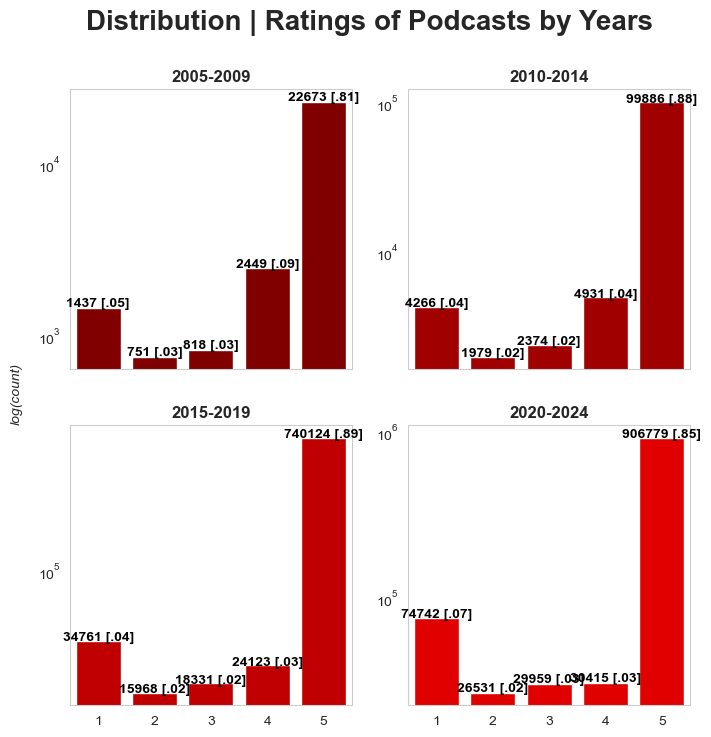

In [30]:
# Group Reviews data in 5-year ranges (e.g. 01/2005-12/2009)
Reviews_5y = Reviews.groupby(pd.Grouper(key='created_at', freq='5Y'))
yearRanges = pd.Series(Reviews_5y.groups.keys()).dt.year
years = Reviews['created_at'].dt.year//5*5

# Create subplots
figure, axes = plt.subplots(
    nrows=2,
    ncols=2,
    # sharey='all',
    dpi=100,
    figsize=(8, 8)
)

axes = np.array(axes).flatten()

for (i, ax), year in zip(enumerate(axes), np.sort(years.unique())):
    data = Reviews[years == year]['rating']
    counts = np.bincount(data)[1:]

    # print(f'Distribution of ranges {year}-{year + 4}')
    # for i in range(len(counts)):
    #     print(f'{i + 1}: {counts[i]} ({round(counts[i]/len(data)*100)}%)')

    for bar in ax.bar(
        np.arange(len(counts)) + 1,
        counts,
        color=colors[i],
        alpha=1
    ):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, 1.15*height,
                    f'{int(height)} [{str(round(int(height)/len(data), 2))[1:]}]',
                    ha='center', va='top', color='black', fontweight='bold')

    ax.set_title(f'{year}-{year + 4}', fontsize=12, fontweight='bold')
    if i < 2:
        ax.set_xticklabels([])
    if not i%2:
        ax.set_yticklabels([])
    ax.set_yscale('log')
    ax.set_xlim(0.5, 5.5)
    ax.grid(visible=False)

# Adjust layout and title
figure.text(.05, .5, 'log(count)', va='center', rotation='vertical', style='italic')
figure.suptitle(
    'Distribution | Ratings of Podcasts by Years\n',
    fontsize=20,
    fontweight='bold'
)
figure.subplots_adjust(hspace=0.2, wspace=0.2)

# Display the plot
plt.show()


Across all different year ranges, the proportions of the distribution of ratings remain relatively similar, with a consistent bias towards higher ratings (4 and 5 stars).

**In the 2005-2009 range,** we observe that the majority (81%) of ratings are 5 stars, indicating a strong positive
 sentiment. The distribution shows a substantial skew towards higher ratings, with relatively fewer lower ratings. This suggests that podcasts from this period received predominantly favorable reviews.

**In the 2010-2014 range,** the distribution also exhibits a strong positive bias, with 88% of ratings being 5
stars.
 This suggests that podcasts from this period continued to receive overwhelmingly positive feedback. The distribution is slightly more balanced than the previous range, with a higher proportion of lower ratings compared to the 2005-2009 range.

**In the 2015-2019 range,** there is a noticeable increase in the number of ratings, with a significant proportion
(89%) still being 5 stars. However, this range also has a more substantial presence of lower ratings compared to the previous ranges. The distribution shows a positive bias towards higher ratings but with a more balanced distribution of lower ratings.

**In the 2020-2024 range,** there is a noticeable increase in the number of lower ratings, with 7% of ratings being 1
 star. However, the majority of ratings (85%) are still 5 stars. This range shows a positive bias towards higher ratings, similar to the previous ranges.

In summary, the analysis of ratings in different year ranges demonstrates a consistent positive bias, with the majority of ratings being 5 stars across all ranges. However, there are variations in the distribution of lower ratings, with some ranges exhibiting a more balanced distribution of lower ratings compared to others. This suggests that user sentiment has remained predominantly positive over time, with some fluctuations in the proportion of lower ratings within each range.

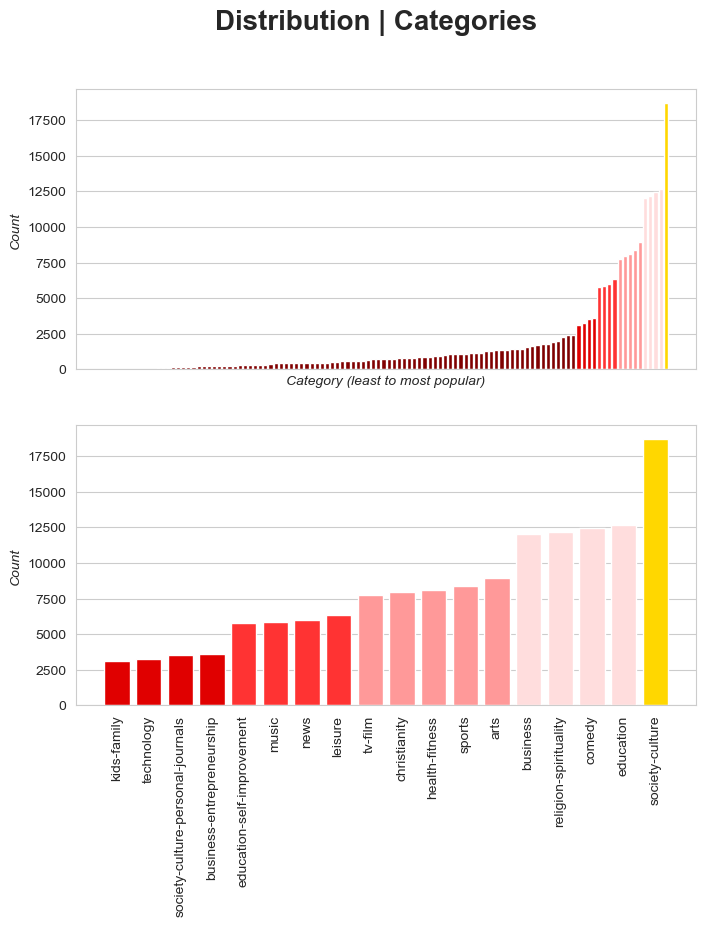

In [31]:
# Create a figure with subplots
figure, axes = plt.subplots(
    ncols=1,
    nrows=2,
    dpi=100,
    figsize=(8, 8)
)

axes = np.array(axes).flatten()
colors_special = [colors[3]]*4 + [colors[5]]*4 + [colors[7]]*5 + [colors[9]]*4 + ['gold']

# Bar chart of distribution of categories
counts = Categories['category'].value_counts(ascending=True)
# print(counts.iloc[92:])
axes[0].bar(range(110), counts, color=[colors[0]]*92 + colors_special)

axes[0].set_xlabel('Category (least to most popular)', style='italic')
axes[0].set_ylabel('Count', style='italic')
axes[0].set_xticks([])

# Bar chart of 17 categories with similar counts
axes[1].bar(counts.index[92:], counts.iloc[92:], color=colors_special)

axes[1].set_ylabel('Count', style='italic')
axes[1].tick_params(axis='x', rotation=90)
axes[1].grid(axis='x')

# Adjust layout and title
figure.suptitle(
    'Distribution | Categories',
    fontsize=20,
    fontweight='bold'

)

plt.show()


1. **Proportions:** The distribution reveals that the "Society & Culture" category has the highest number of
podcasts, with 18,710 podcasts, followed by "Education" and "Comedy" with 12,628 and 12,464 podcasts, respectively.
2. **Diversity:** The analysis also highlights the diversity of podcast content, with categories spanning a wide
range of topics, including entertainment, education, religion, and health. The presence of multiple categories
with thousands of podcasts indicates the broad appeal of podcasting as a medium.
3. **Imbalance:** While some categories have a substantial number of podcasts, others have a much smaller presence. This imbalance suggests that certain podcast genres or topics may be more popular or competitive than others.

In summary, the distribution of podcast counts across categories shows a highly skewed pattern, with some categories
having a significantly higher number of podcasts compared to others. This diversity in content reflects the wide range of interests and topics covered in the podcasting landscape.

In [32]:
# Analyze the similarity between different categories
Categories_pivot = Categories.pivot(index='podcast_id', columns='category', values='category').notnull()\
    .astype(int)
correlations_categories = Categories_pivot.corr()

groups = []
for i, col in enumerate(correlations_categories.columns):
    added = False
    for group in groups:
        if any(correlations_categories.loc[col, category] >= .15 for category in group):
            group.append(col)
            added = True
            break

    if not added:
        groups.append([col])

for i, group in enumerate(groups):
    print(f"Group {i + 1}: {', '.join(group)}")

# Add genres for each category
genres = (
    'arts', 'religion', 'business', 'business', 'religion', 'comedy', 'comedy', 'education', 'fiction',
    'government', 'health', 'religion', 'history', 'religion', 'religion', 'kids', 'leisure', 'leisure',
    'leisure', 'leisure', 'leisure', 'music', 'news', 'religion', 'science', 'science', 'science',
    'science', 'science', 'society-culture', 'society-culture', 'sports', 'sports', 'sports', 'sports',
    'sports', 'sports', 'sports', 'sports', 'sports', 'true-crime', 'tv-film-info', 'tv-film-info'
)

d = {category: genres[_] for _ in range(len(genres)) for category in groups[_]}
Categories['genre'] = Categories['category'].map(d)


Group 1: arts, arts-books, arts-design, arts-fashion-beauty, arts-food, arts-performing-arts, arts-visual-arts
Group 2: buddhism
Group 3: business, business-careers, business-entrepreneurship, business-investing, business-management, business-marketing
Group 4: business-non-profit
Group 5: christianity, religion-spirituality, spirituality
Group 6: comedy, comedy-comedy-interviews, comedy-improv
Group 7: comedy-stand-up
Group 8: education, education-courses, education-how-to, education-language-learning, education-self-improvement
Group 9: fiction, fiction-comedy-fiction, fiction-drama, fiction-science-fiction
Group 10: government
Group 11: health-fitness, health-fitness-alternative-health, health-fitness-fitness, health-fitness-medicine, health-fitness-mental-health, health-fitness-nutrition, health-fitness-sexuality
Group 12: hinduism
Group 13: history
Group 14: islam
Group 15: judaism
Group 16: kids-family, kids-family-education-for-kids, kids-family-parenting, kids-family-pets-anima

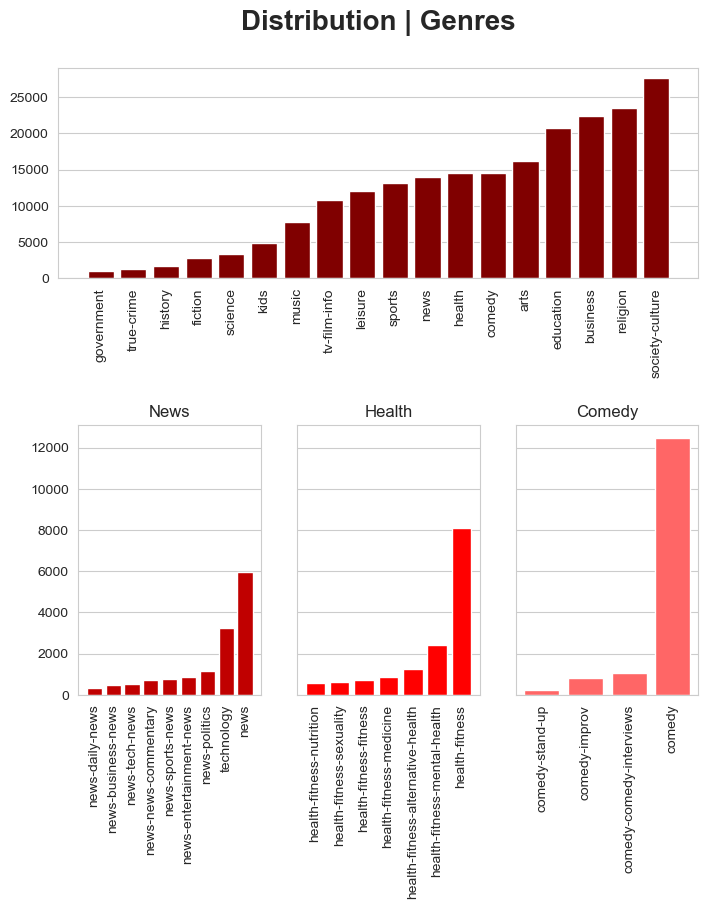

In [33]:
# Create a figure with subplots
figure = plt.figure(dpi=100, figsize=(8, 7))
subfigures = figure.subfigures(2, 1)

axes_top = subfigures[0].subplots(1, 1)
axes = subfigures[1].subplots(1, 3, sharey=True)
axes = np.array(axes).flatten()

# Prepare plotting data
axes = np.insert(axes, 0, axes_top)
gen = ('genre', 'news', 'health', 'comedy')


def makebarchart(i):
    # Create bar chart
    counts = Categories['genre'].value_counts(ascending=True) if gen[i] == 'genre' else \
        Categories['category'][Categories['genre'] ==  gen[i]].value_counts(ascending=True)

    axes[i].bar(counts.index, counts, color=colors[i*2])

    if i < 2:
        ax.set_ylabel('Count', style='italic')
    axes[i].tick_params(axis='x', rotation=90)
    axes[i].grid(axis='x')
    axes[i].tick_params(axis='x', which='both', bottom=False, top=False)  # Hide x-axis ticks on top

    # Adjust layout and title
    if not i:
        axes[i].set_position([.1, .3, .8, .6])
        axes[i].set_title(
            'Distribution | Genres\n',
            fontsize=20,
            fontweight='bold'
        )
    else:
        axes[i].set_title(
            gen[i].capitalize(),
            fontsize=12
        )

    return


tuple(makebarchart(_) for _ in range(4))

plt.show()


Upon closer examination of the dataset, we observe interesting patterns in the distribution of podcasts when categorized into more general sections or genres. Unlike the previous analysis, where overall podcast counts exhibited a right-skewed distribution, segmenting them into genres reveals a more linear distribution.

Furthermore, a more detailed inspection of specific genres uncovers that the imbalance in podcast distribution is
concentrated within certain categories. This suggests that certain podcast genres may be significantly more popular or competitive than others, leading to a disparity in the number of podcasts within each category.

This finding raises an intriguing possibility: when comparing the distribution of podcasts by genres with the listener base of each genre, we may discover a linear relationship. In contrast, when examining categories, the distribution likely reflects the specific interests listeners have within a broader topic of interest.

In summary, data preparation is a critical phase that ensures the datasets are pristine, up-to-date, and free from
anomalies. By performing data cleaning, updating, and outlier checks, we pave the way for accurate, reliable, and insightful data analysis in the subsequent stages of this project.

## Exploratory Data Analysis

In [84]:
# Create an aggregation of all data
Data = pd.merge(
    Reviews[['podcast_id', 'rating', 'created_at']],
    Categories[['podcast_id', 'category', 'genre']],
    on='podcast_id'
)

Data.recap(n_rows=10)


Number of Observations: 4529483; 
Number of Features: 5.
- Categorical features: category, genre; 
- Numerical features: podcast_id, rating.


,podcast_id,rating,created_at,category,genre
0,1,5,2017-11-29 12:16:43-07:00,business,business
1,2,5,2019-10-08 04:23:32-07:00,christianity,religion
2,2,5,2019-10-08 04:23:32-07:00,religion-spirituality,religion
3,3,1,2011-09-06 14:11:08-07:00,religion-spirituality,religion
4,3,1,2011-09-06 14:11:08-07:00,spirituality,religion
5,4,5,2018-01-16 18:57:38-07:00,business,business
6,4,5,2018-01-16 18:57:38-07:00,business-investing,business
7,4,5,2018-01-18 21:59:11-07:00,business,business
8,4,5,2018-01-18 21:59:11-07:00,business-investing,business
9,4,5,2018-05-11 18:40:15-07:00,business,business


### Quantitative measures of Categories dataset:

In [35]:
# Create dataset to store data of Categories
Categories_info = pd.DataFrame(d, index=['genre']).T

# Number of podcasts
Categories_info['n_podcasts'] = Categories['category'].value_counts()

# Number of reviews
Categories_info['n_reviews'] = Data['category'].value_counts()

# Average rating
Categories_info['rating_avr'] = Data.groupby('category')['rating'].mean()

# Recap
Categories_info.recap(n_rows=10)


Number of Observations: 110; 
Number of Features: 4.
- Categorical features: genre; 
- Numerical features: n_podcasts, n_reviews, rating_avr.


,genre,n_podcasts,n_reviews,rating_avr
arts,arts,8953,136508,4.727782
arts-books,arts,1978,30613,4.681933
arts-design,arts,596,9431,4.811367
arts-fashion-beauty,arts,610,14945,4.649716
arts-food,arts,1074,16556,4.781107
arts-performing-arts,arts,1805,30404,4.703888
arts-visual-arts,arts,1137,16638,4.822154
buddhism,religion,141,1313,4.773039
business,business,12058,210081,4.839410
business-careers,business,2445,53921,4.890061


In [36]:
Categories_info.describe().T

,count,mean,std,min,25%,50%,75%,max
n_podcasts,110.0,1930.654545,3258.322196,14.000000,288.250000,727.000000,1568.500000,18710.000000
n_reviews,110.0,41177.118182,68781.039431,84.000000,5876.500000,17769.000000,38433.000000,441874.000000
rating_avr,110.0,4.695710,0.174850,3.965203,4.612307,4.752511,4.817755,4.988024


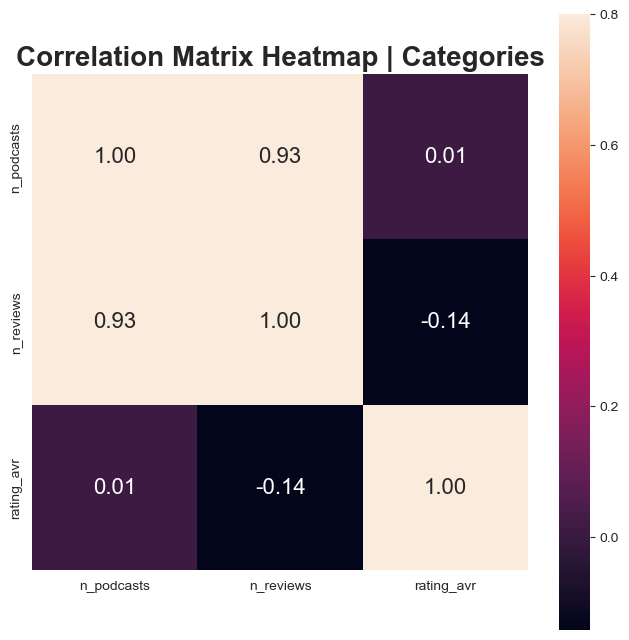

In [37]:
Categories_info.corr_heatmap(title='categories')

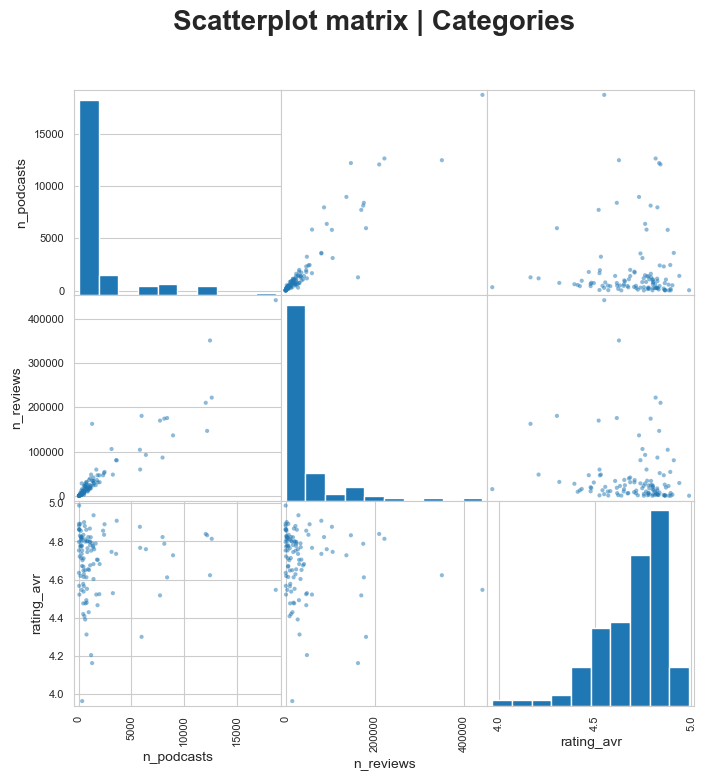

In [38]:
# Create scatterplots for all pairs of columns
pd.plotting.scatter_matrix(Categories_info, figsize=(8, 8), alpha=0.5, diagonal='hist')

# Add plot title
plt.suptitle(
    'Scatterplot matrix | Categories',
    fontsize=20,
    fontweight='bold'

)

# Show the plot
plt.show()

### Quantitative measures of Podcast dataset:

In [39]:
# Create dataset to store data of Podcasts
Podcasts_info = Podcasts.copy()

# Number of reviews
Podcasts_info['n_reviews'] = Reviews['podcast_id'].value_counts()

# Number of categories
Podcasts_info['category'] = Categories.groupby(by='podcast_id')['category'].agg(set)
Podcasts_info['n_categories'] = Podcasts_info['category'].apply(len)

# Number of genres
Podcasts_info['genre'] = Categories.groupby(by='podcast_id')['genre'].agg(set)
Podcasts_info['n_genres'] = Podcasts_info['genre'].apply(len)

# Average ratings
Podcasts_info['rating_avr'] = Data.groupby('podcast_id')['rating'].mean()

# Time first review was created
Podcasts_info['first_created'] = Data.groupby('podcast_id')['created_at'].min()
Podcasts_info['first_created_n'] = Podcasts_info['first_created'].apply(lambda x: x.timestamp())/10**9

# Recap
Podcasts_info.recap(n_rows=10)


Number of Observations: 110024; 
Number of Features: 9.
- Categorical features: title, category, genre; 
- Numerical features: n_reviews, n_categories, n_genres, rating_avr, first_created_n.


,title,n_reviews,category,n_categories,genre,n_genres,rating_avr,first_created,first_created_n
podcast_id,,,,,,,,,
1,Scaling Global,1,{business},1,{business},1,5.0000,2017-11-29 12:16:43-07:00,1.511983
2,Cornerstone Baptist Church of Orlando,1,"{religion-spirituality, christianity}",2,{religion},1,5.0000,2019-10-08 04:23:32-07:00,1.570534
3,Mystery: Dancing in the Dark,1,"{religion-spirituality, spirituality}",2,{religion},1,1.0000,2011-09-06 14:11:08-07:00,1.315343
4,KTs Money Matters,4,"{business, business-investing}",2,{business},1,5.0000,2018-01-16 18:57:38-07:00,1.516154
5,Word on the Street w/ Dreak Swift,2,{news-entertainment-news},1,{news},1,5.0000,2021-05-10 11:27:43-07:00,1.620671
6,Speedway Soccer,15,"{arts, sports}",2,"{arts, sports}",2,5.0000,2018-01-31 21:09:40-07:00,1.517458
7,Showing Up for You,1,"{education, education-self-improvement}",2,{education},1,5.0000,2022-02-16 22:50:57-07:00,1.645077
8,"Bethany Baptist Church, Bellflower CA",3,"{religion-spirituality, christianity}",2,{religion},1,5.0000,2017-09-16 17:24:35-07:00,1.505608
9,Mindful Communication Podcast,4,"{society-culture, education, society-culture-p...",3,"{society-culture, education}",2,5.0000,2019-02-04 07:56:33-07:00,1.549292


In [40]:
Podcasts_info.describe().T

,count,mean,std,min,25%,50%,75%,max
n_reviews,110024.0,18.571375,151.075006,1.00000,1.000000,3.000000,8.000000,33104.000000
n_categories,110024.0,1.930233,0.974477,1.00000,1.000000,2.000000,2.000000,8.000000
n_genres,110024.0,1.277594,0.476660,1.00000,1.000000,1.000000,2.000000,5.000000
rating_avr,110024.0,4.810112,0.568038,1.00000,5.000000,5.000000,5.000000,5.000000
first_created_n,110024.0,1.539081,0.098946,1.13419,1.508386,1.566236,1.606146,1.673914


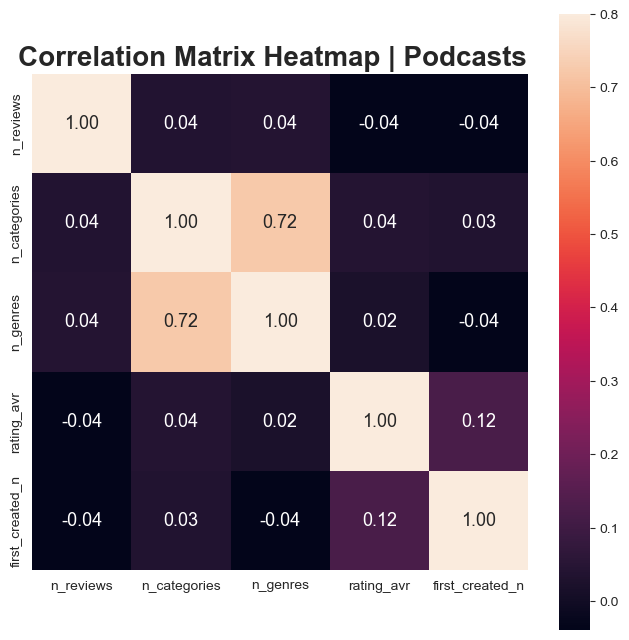

In [41]:
Podcasts_info.corr_heatmap(title='podcasts  ')

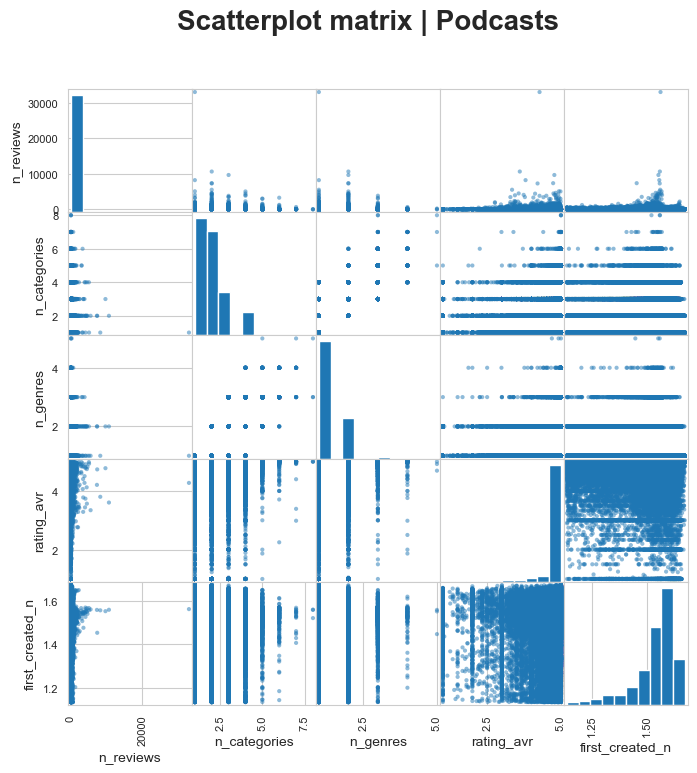

In [42]:
# Create scatterplots for all pairs of columns
scatter_matrix = pd.plotting.scatter_matrix(Podcasts_info, figsize=(8, 8), alpha=0.5, diagonal='hist')

# Add plot title
plt.suptitle(
    'Scatterplot matrix | Podcasts',
    fontsize=20,
    fontweight='bold'

)

# Show the plot
plt.show()

### Quantitative measures of Reviews dataset:

In [43]:
# Create dataset to store data of Reviews
Reviews_info = pd.DataFrame({
    'podcast_id': Reviews['podcast_id'],
    'i_review': 0,
    'rating': Reviews['rating'],
    'rating_curr': 0,
    'rating_prev':0,
    'length_title': Reviews['title'].apply(len),
    'length_content': Reviews['content'].apply(len),
    'created_at': Reviews['created_at'],
    'created_at_n': Reviews['created_at'].apply(lambda x: x.timestamp())/10**9
})

# Order of review
Reviews_info['i_review'] = Reviews.groupby('podcast_id').cumcount() + 1

# Rolling rating
Reviews_info['rating_curr'] = Reviews.groupby('podcast_id')['rating'].expanding().mean().reset_index(level=0, drop=True)
Reviews_info['rating_curr'] = Reviews_info.groupby('podcast_id')['rating_curr'].shift()

# Previous rating
Reviews_info['rating_prev'] = Reviews_info.groupby('podcast_id')['rating'].shift()

# Recap
Reviews_info.recap(n_rows=10)


Number of Observations: 2043297; 
Number of Features: 9.
- Categorical features: ; 
- Numerical features: podcast_id, i_review, rating, rating_curr, rating_prev, length_title, length_content, created_at_n.


,podcast_id,i_review,rating,rating_curr,rating_prev,length_title,length_content,created_at,created_at_n
604710,1,1,5,NaN,NaN,16,26,2017-11-29 12:16:43-07:00,1.511983
604711,2,1,5,NaN,NaN,12,144,2019-10-08 04:23:32-07:00,1.570534
604712,3,1,1,NaN,NaN,5,71,2011-09-06 14:11:08-07:00,1.315343
99854,4,1,5,NaN,NaN,24,94,2018-01-16 18:57:38-07:00,1.516154
99853,4,2,5,5.0,5.0,16,140,2018-01-18 21:59:11-07:00,1.516338
99856,4,3,5,5.0,5.0,25,202,2018-05-11 18:40:15-07:00,1.526089
99855,4,4,5,5.0,5.0,15,460,2018-11-24 17:06:55-07:00,1.543104
2007618,5,1,5,NaN,NaN,10,95,2021-05-10 11:27:43-07:00,1.620671
2007619,5,2,5,5.0,5.0,16,105,2021-07-06 13:57:57-07:00,1.625605
568839,6,1,5,NaN,NaN,36,37,2018-01-31 21:09:40-07:00,1.517458


In [44]:
Reviews_info.describe().T

,count,mean,std,min,25%,50%,75%,max
podcast_id,2043297.0,54546.292050,31249.480574,1.00000,28905.000000,53450.000000,81485.000000,110024.000000
i_review,2043297.0,624.264949,2544.607788,1.00000,12.000000,71.000000,315.000000,33104.000000
rating,2043297.0,4.627370,1.045739,1.00000,5.000000,5.000000,5.000000,5.000000
rating_curr,1933273.0,4.696038,0.479646,1.00000,4.600000,4.900000,5.000000,5.000000
rating_prev,1933273.0,4.620307,1.054698,1.00000,5.000000,5.000000,5.000000,5.000000
length_title,2043297.0,19.751498,12.151165,0.00000,11.000000,17.000000,26.000000,100.000000
length_content,2043297.0,239.257534,240.711088,20.00000,95.000000,177.000000,304.000000,6000.000000
created_at_n,2043297.0,1.561519,0.086629,1.13419,1.530033,1.581542,1.617848,1.676562


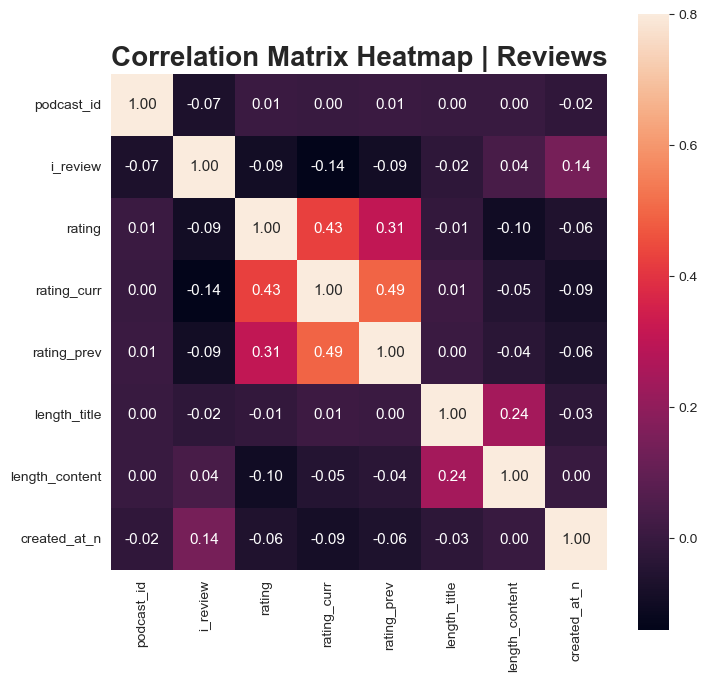

In [45]:
Reviews_info.corr_heatmap(title='reviews')

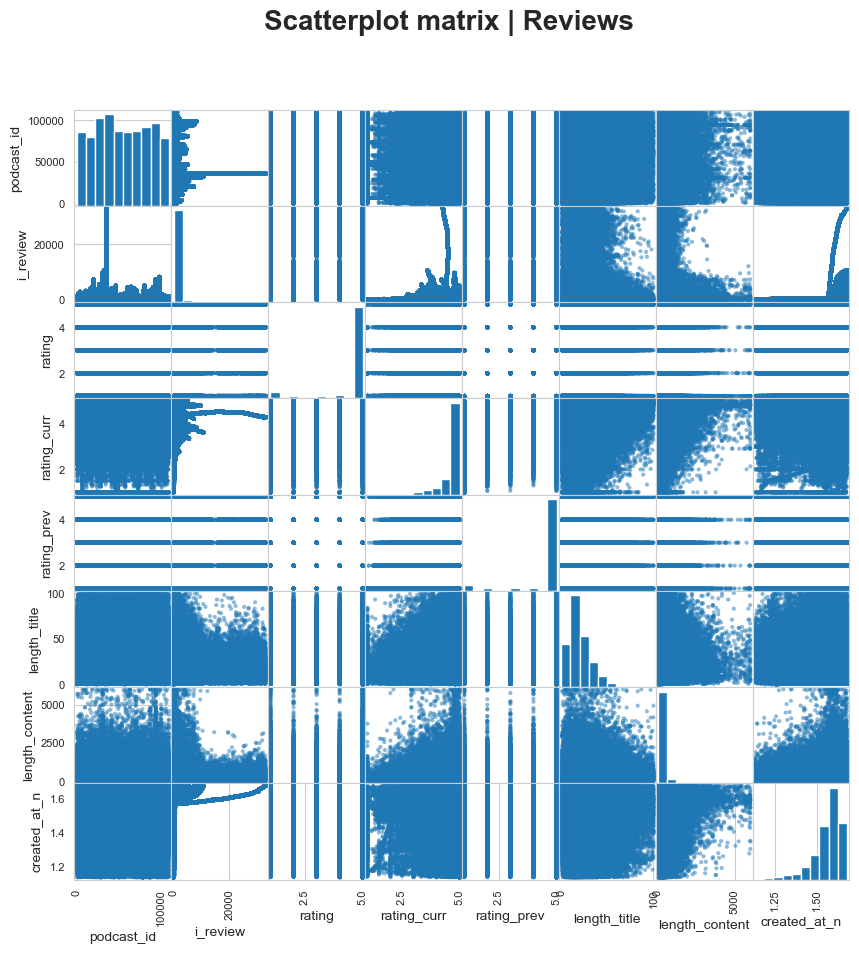

In [46]:
# Create scatterplots for all pairs of columns
pd.plotting.scatter_matrix(Reviews_info, figsize=(10, 10), alpha=0.5, diagonal='hist')

# Add plot title
plt.suptitle(
    'Scatterplot matrix | Reviews',
    fontsize=20,
    fontweight='bold'

)

# Rotate x- and y-axis labels
for ax in scatter_matrix.ravel():
    ax.xaxis.label.set_rotation(90)
    ax.yaxis.label.set_rotation(0)

# Show the plot
plt.show()

### 1. How are the frequencies of words used correlated with different ratings?

In [47]:
# Function to remove unimportant words from text
def remove_words(text, words):
    text = text.lower().replace('’', '')

    for word in words:
        text = text.replace(f' {word}', '').replace(f'{word} ', '')

    for letter in 'abcdefghijklmnopqrstuvwxyz':
        text = text.replace(f' {letter} ', ' ')

    return text


# Functon to create word-cloud plots
def create_wordCloud(data, words_rm, title=None):
    wordcloud = WordCloud(width = 800, height = 800,
                          background_color ='white',
                          min_font_size = 20
                         ).generate(remove_words(" ".join(data.values), words_rm))
    plt.figure(figsize = (8, 8), facecolor = None)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.tight_layout(pad = 0)
    plt.title(title,fontsize=50, fontweight='bold')
    plt.show()


words = (
    'podcasts', 'podcast',
    'listening', 'listener', 'listened', 'listens', 'listen',
    'showing', 'shows', 'show',
    'episodes', 'episode',
    'people',
    'hosts', 'host',
    'loves', 'lover', 'love',
    'ones', 'one',
    'make',
    'time'
)

# create_wordCloud(Reviews['content'], words_rm=words, title="All")

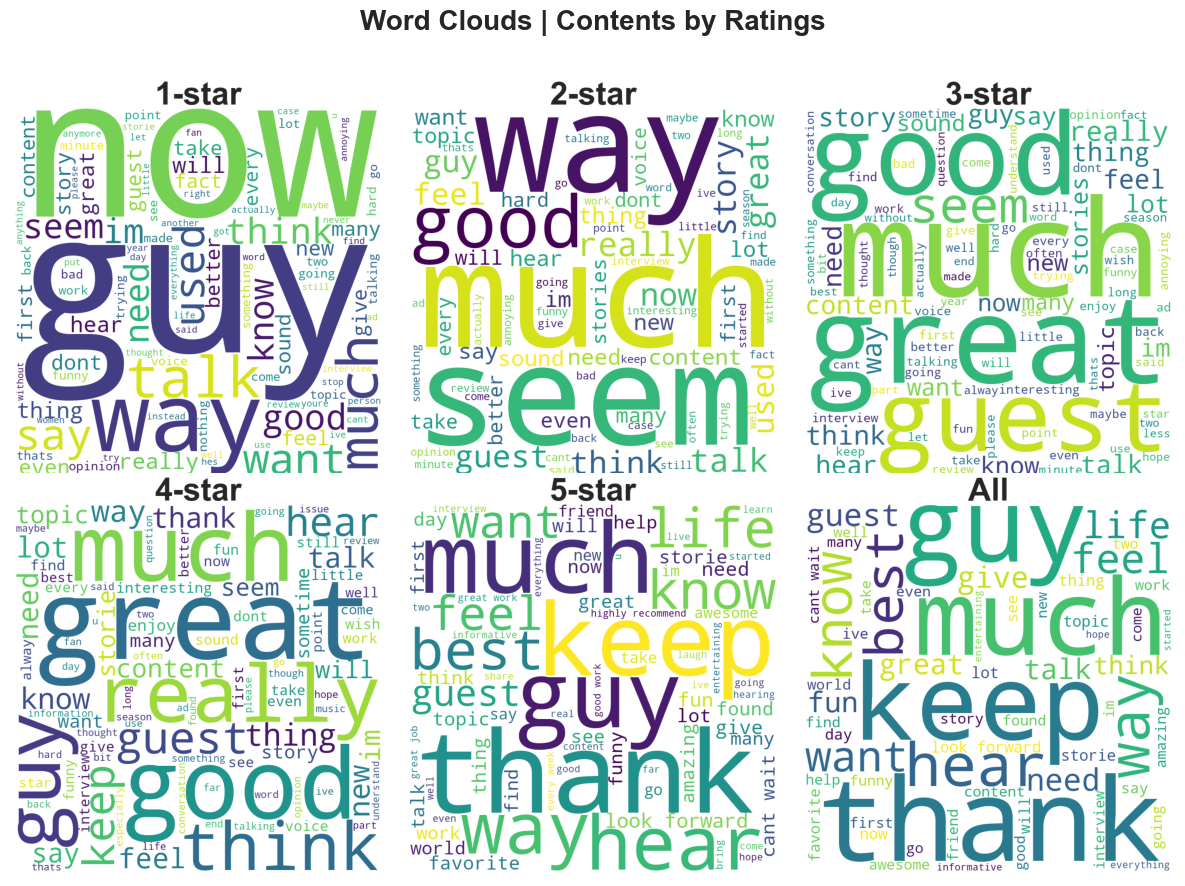

In [48]:
# Create subplots
figure, axes = plt.subplots(
    nrows=2,
    ncols=3,
    # sharey='all',
    dpi=100,
    figsize=(12, 9)
)

axes = np.array(axes).flatten()

for i in range(6):
    axes[i].imshow(mpimg.imread(f'./plots/cloud_{i + 1}.png'))
    axes[i].axis('off')


# Adjust layout and title
figure.suptitle(
    'Word Clouds | Contents by Ratings\n',
    fontsize=20,
    fontweight='bold'
)
figure.subplots_adjust(hspace=0.2, wspace=0.2)
plt.tight_layout()

# Display the plot
plt.show()

### 2. Does the number of categories/genres affect the distribution of average ratings of podcasts?

<Figure size 800x800 with 0 Axes>

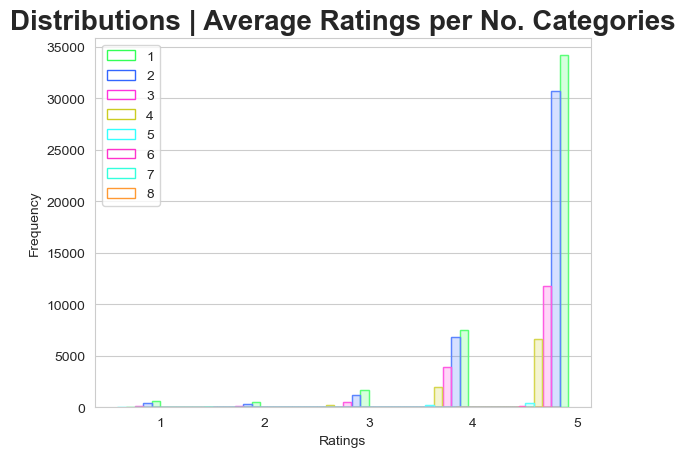

In [49]:
# Create a boxplot for each number of categories
plt.figure(figsize=(8, 8))
Podcasts_info_g = Podcasts_info.groupby('n_categories')

fig, ax = plt.subplots()
rainbow = [
    '#FF5733',  # Red
    '#33FF57',  # Green
    '#3366FF',  # Blue
    '#FF33DD',  # Pink
    '#CCCC22',  # Yellow
    '#33FFFF',  # Cyan
    '#FF33CC',  # Magenta
    '#33FFDD',  # Teal
    '#FF9933',  # Orange
    '#9933FF',  # Purple
]

for group, group_data in Podcasts_info_g:
    ax.hist(group_data['rating_avr'].astype(int) - group/12, bins=50, label=group,
            alpha=1, fill=False, edgecolor=rainbow[group])
    ax.hist(group_data['rating_avr'].astype(int) - group/12, bins=50,
            alpha=.2, fill=True, color=rainbow[group])

# Customize the plot
ax.set_xlabel('Ratings')
ax.set_ylabel('Frequency')
ax.set_title(
    "Distributions | Average Ratings per No. Categories",
    fontsize=20,
    fontweight='bold'
)

ax.legend()
ax.xaxis.grid(False)

# Show the plot
plt.show()


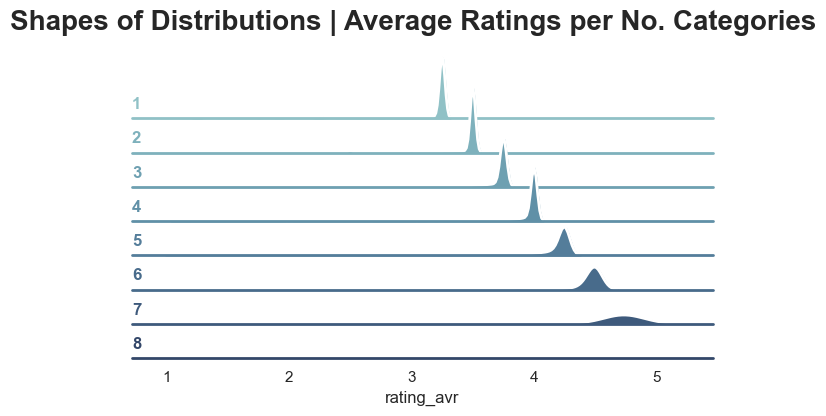

In [50]:
# Set plot theme
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

# Organize data for plot
data = pd.DataFrame({
        'n_categories': Podcasts_info['n_categories'],
        'rating_avr': Podcasts_info['rating_avr'] + Podcasts_info['n_categories']/4 - 2
    })

# Initialize the FacetGrid object
pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
g = sns.FacetGrid(
    data[data['rating_avr'] > 1],
    row="n_categories",
    hue="n_categories",
    aspect=15,
    height=.5,
    palette=pal
)

# Draw the densities
g.map(sns.kdeplot, "rating_avr",
      bw_adjust=.5, clip_on=False,
      fill=True, alpha=1, linewidth=1)
g.map(sns.kdeplot, "rating_avr", clip_on=False, color="w", lw=2, bw_adjust=.5)

# passing color=None to refline() uses the hue mapping
g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)


# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)


g.map(label, "rating_avr")

# Set the subplots to overlap
g.figure.subplots_adjust(hspace=-.5)

# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[], ylabel="")
g.despine(bottom=True, left=True)

# Add plot title
plt.suptitle(
    'Shapes of Distributions | Average Ratings per No. Categories',
    fontsize=20,
    fontweight='bold'

)

# Show the plot
plt.show()

<Figure size 800x800 with 0 Axes>

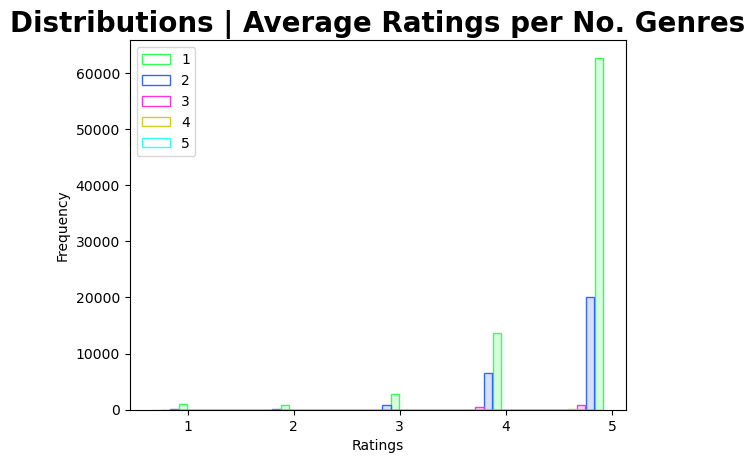

In [51]:
# Set the Matplotlib style back to default
plt.style.use('default')

# Create a boxplot for each number of categories
plt.figure(figsize=(8, 8))
Podcasts_info_g = Podcasts_info.groupby('n_genres')

fig, ax = plt.subplots()

for group, group_data in Podcasts_info_g:
    ax.hist(group_data['rating_avr'].astype(int) - group/12, bins=50, label=group,
            alpha=1, fill=False, edgecolor=rainbow[group])
    ax.hist(group_data['rating_avr'].astype(int) - group/12, bins=50,
            alpha=.2, fill=True, color=rainbow[group])

# Customize the plot
ax.set_xlabel('Ratings')
ax.set_ylabel('Frequency')
ax.set_title(
    "Distributions | Average Ratings per No. Genres",
    fontsize=20,
    fontweight='bold'
)

# Get the legend and set the background color
ax.legend()

# Remove horizontal axis
ax.xaxis.grid(False)

# Show the plot
plt.show()


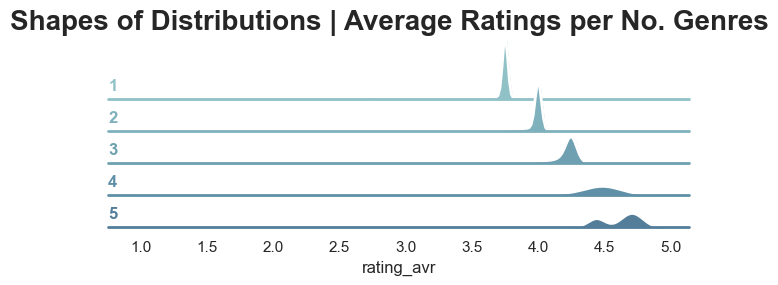

In [52]:
# Set plot theme
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

# Organize data for plot
data = pd.DataFrame({
        'n_genres': Podcasts_info['n_genres'],
        'rating_avr': Podcasts_info['rating_avr'] + Podcasts_info['n_genres']/4 - 1.5
    })

# Initialize the FacetGrid object
pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
g = sns.FacetGrid(
    data[data['rating_avr'] > 1],
    row="n_genres",
    hue="n_genres",
    aspect=15,
    height=.5,
    palette=pal
)

# Draw the densities
g.map(sns.kdeplot, "rating_avr",
      bw_adjust=.5, clip_on=False,
      fill=True, alpha=1, linewidth=1)
g.map(sns.kdeplot, "rating_avr", clip_on=False, color="w", lw=2, bw_adjust=.5)

# passing color=None to refline() uses the hue mapping
g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)


# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)


g.map(label, "rating_avr")

# Set the subplots to overlap
g.figure.subplots_adjust(hspace=-.5)

# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[], ylabel="")
g.despine(bottom=True, left=True)

# Add plot title
plt.suptitle(
    'Shapes of Distributions | Average Ratings per No. Genres',
    fontsize=20,
    fontweight='bold'

)

# Show the plot
plt.show()

### 3. How do rolling ratings change for the most popular/reviewed podcasts?

In [53]:
podcasts_top5 = Podcasts_info.nlargest(5, 'n_reviews')
podcasts_top5


,title,n_reviews,category,n_categories,genre,n_genres,rating_avr,first_created,first_created_n
podcast_id,,,,,,,,,
35970,Crime Junkie,33104,{true-crime},1,{true-crime},1,4.274982,2019-07-04 07:37:10-07:00,1.562251
32532,My Favorite Murder with Karen Kilgariff and Ge...,10675,"{true-crime, comedy}",2,"{true-crime, comedy}",2,3.605714,2019-05-30 08:46:28-07:00,1.559231
30874,Wow in the World,9698,"{education, kids-family, kids-family-stories-f...",3,"{education, kids}",2,4.776243,2019-03-15 16:58:30-07:00,1.552694
98616,The Ben Shapiro Show,8248,{news},1,{news},1,3.801285,2019-04-30 12:32:17-07:00,1.556653
94316,Story Pirates,7389,"{kids-family, comedy}",2,"{kids, comedy}",2,4.735553,2016-01-20 08:51:35-07:00,1.453305


In [54]:
Reviews_info_top5 = Reviews_info[Reviews_info['podcast_id'].isin(podcasts_top5.index)]
Reviews_info_top5.recap(n_rows=10)

Number of Observations: 69114; 
Number of Features: 9.
- Categorical features: ; 
- Numerical features: podcast_id, i_review, rating, rating_curr, rating_prev, length_title, length_content, created_at_n.


,podcast_id,i_review,rating,rating_curr,rating_prev,length_title,length_content,created_at,created_at_n
265865,30874,1,5,NaN,NaN,16,45,2019-03-15 16:58:30-07:00,1.552694
265895,30874,2,5,5.000000,5.0,17,171,2019-03-15 17:38:36-07:00,1.552697
265870,30874,3,3,5.000000,5.0,23,168,2019-03-15 21:16:51-07:00,1.552710
265885,30874,4,5,4.333333,3.0,24,98,2019-03-18 14:35:22-07:00,1.552945
265871,30874,5,5,4.500000,5.0,8,60,2019-03-18 17:38:18-07:00,1.552956
265907,30874,6,1,4.600000,5.0,19,84,2019-03-18 17:51:48-07:00,1.552957
265896,30874,7,1,4.000000,1.0,21,150,2019-03-19 06:58:46-07:00,1.553004
265876,30874,8,5,3.571429,1.0,20,841,2019-03-19 17:25:46-07:00,1.553042
265864,30874,9,5,3.750000,5.0,26,186,2019-03-19 18:57:41-07:00,1.553047
265882,30874,10,5,3.888889,5.0,16,56,2019-03-20 03:45:13-07:00,1.553079


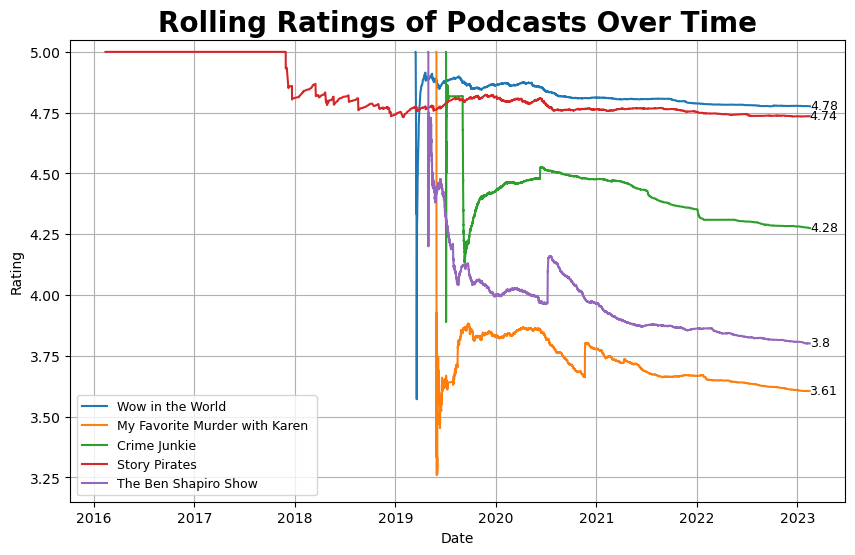

In [55]:
# Set the Matplotlib style back to default
plt.style.use('default')

# Group the Reviews by 'podcast_id'
Reviews_info_top5_g = Reviews_info_top5.groupby('podcast_id')

# Plot the time series for each group
plt.figure(figsize=(10, 6))
for id, group in Reviews_info_top5_g:
    plt.plot(group['created_at'], group['rating_curr'], label=Podcasts_info.loc[id]['title'][:30])
    last_date = group['created_at'].iloc[-1]
    last_value = group['rating_curr'].iloc[-1]
    plt.text(last_date, last_value - .025, round(last_value, 2), ha='left', va='bottom', fontsize=9)

# Customize the plot
plt.title(
    'Rolling Ratings of Podcasts Over Time',
    fontsize=20,
    fontweight='bold'
)

plt.xlabel('Date')
plt.ylabel('Rating')
plt.legend(fontsize=9)
plt.ylim(3.15, 5.05)

# Show the plot
plt.grid(True)
plt.show()


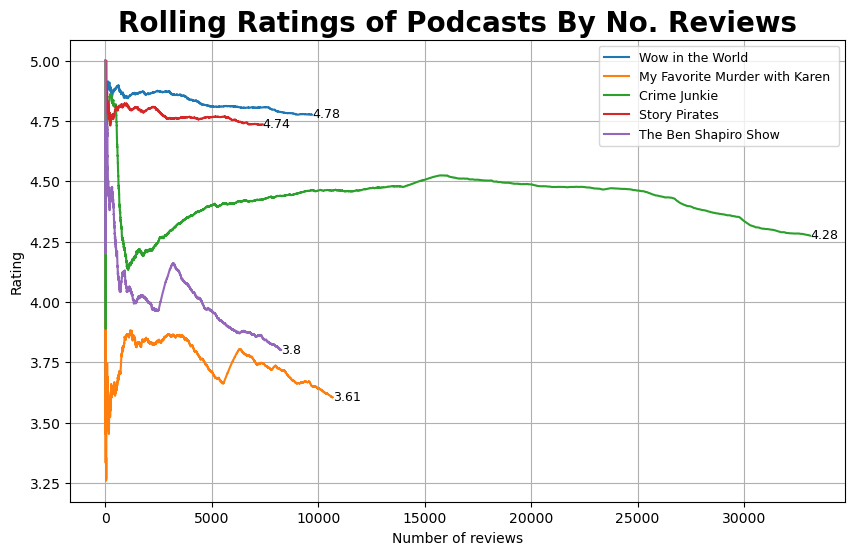

In [56]:
# Group the Reviews by 'podcast_id'
Reviews_info_top5_g = Reviews_info_top5.groupby('podcast_id')

# Plot the time series for each group
plt.figure(figsize=(10, 6))
for id, group in Reviews_info_top5_g:
    plt.plot(group['i_review'], group['rating_curr'], label=Podcasts_info.loc[id]['title'][:30])
    x_last = group['i_review'].iloc[-1]
    y_last = group['rating_curr'].iloc[-1]
    plt.text(x_last, y_last - .025, round(y_last, 2), ha='left', va='bottom', fontsize=9)

# Customize the plot
plt.title(
    'Rolling Ratings of Podcasts By No. Reviews',
    fontsize=20,
    fontweight='bold'
)

plt.xlabel('Number of reviews')
plt.ylabel('Rating')
plt.legend(fontsize=9)

# Show the plot
plt.grid(True)
plt.show()


## Modeling
We will harness the transformative power of the BERT (Bidirectional Encoder Representations from Transformers)
framework developed by Google. BERT has revolutionized the field of Natural Language Processing (NLP) by enabling us to analyze and understand textual data in profound ways.

Our objective in this section is to build a highly capable machine learning model that can unlock valuable insights from the vast and dynamic dataset of iTunes podcast reviews.

### Stratified splitting of reviews data into training and testing sets:
Because our reviews datasets may have classes that are significantly fewer samples than others, this method is
used to ensure that the class distribution in the training and testing sets is similar.

In [57]:
# Create an aggregation of reviews ratings, contents, categories, and genres
Data = pd.merge(
    Reviews[['podcast_id', 'rating', 'content']],
    Podcasts_info.reset_index()[['podcast_id', 'category', 'genre']],
    on='podcast_id'
)

Data.drop(columns=['podcast_id'], inplace=True)

Data.recap(n_rows=10)

Number of Observations: 2043297; 
Number of Features: 4.
- Categorical features: content, category, genre; 
- Numerical features: rating.


,rating,content,category,genre
0,5,Great variety of speakers!,{business},{business}
1,5,I'm a regular listener. I only wish that the ...,"{religion-spirituality, christianity}",{religion}
2,1,Thts so weird... However made tht is weird. Du...,"{religion-spirituality, spirituality}",{religion}
3,5,"So excited to have this come to reality, well ...","{business, business-investing}",{business}
4,5,Really enjoy this podcast! Quick and to the po...,"{business, business-investing}",{business}
5,5,Inspiration & Information that transforms busi...,"{business, business-investing}",{business}
6,5,"Hi KT, I love listening to your show and I hav...","{business, business-investing}",{business}
7,5,Word on the Street w/ Dreak Swift is one of th...,{news-entertainment-news},{news}
8,5,"Best podcast ever, don’t want to miss out plus...",{news-entertainment-news},{news}
9,5,Independent Nashville Soccer Content.,"{arts, sports}","{arts, sports}"


In [58]:
# Extract relevant data
ratings_reviews = Data[['rating', 'content']]

stratified_split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in stratified_split.split(Data[['content', 'category', 'genre']], Data['rating']):
    df_train, df_test = ratings_reviews.loc[train_index], ratings_reviews.loc[test_index]


In [59]:
df_train.recap(n_rows=10)

Number of Observations: 1634637; 
Number of Features: 2.
- Categorical features: content; 
- Numerical features: rating.


,rating,content
831659,5,I agree that it good. It good fun too
362525,5,You live so long gathering information and try...
1861163,5,Tony hosts a great show with some of the most ...
1432670,5,Thank you so much for such a great podcast. I’...
641304,4,"Ususally, the stories are interesting and info..."
830248,5,"Super helpful, & enjoyable."
1019495,5,Thank you Father. You found your niche. Hope y...
549010,5,"5 star reviews only ❤️, been a fan for a while..."
1641322,1,I used to love Jackie bc she’s a boss ... unti...
346061,5,Seriously. I love these twos. I laugh OUT LOUD...


In [60]:
df_test.recap(n_rows=10)

Number of Observations: 408660; 
Number of Features: 2.
- Categorical features: content; 
- Numerical features: rating.


,rating,content
184996,5,So glad there is s new choice for morning spor...
898327,5,I wonder how many reviews I can do! Great job ...
1105446,5,This podcast is awesome and Lane helps you und...
1398104,5,"I like that the podcasts are short, good for k..."
1976521,3,Can’t do the OMG uptick of every sentence. Lik...
1003997,5,"These episodes never fail in making you laugh,..."
288133,1,Good if you wanna listen to a pro sexual assau...
2018518,5,I stumbled upon this podcast search for Gabby ...
1627449,5,These guys are absolute rammers. \n5 stars.
1475277,5,Humphrey Camadella Productions comes through w...


### Preparing data for BERT:
To use BERT, we need to format the data as follows:

- Column 0: A row ID. (Needed for both train and test data.)
- Column 1: A class label. (Needed only for train data.)
- Column 2: A dummy column with the same letter for all rows. (Needed only for train data, because BERT expects it.)
- Column 3: The text to classify. (Needed for both train and test data.)

We also need to split the data into two files called train and dev for training, and optionally a third file called test without labels for testing. Finally, we need to save the files as .tsv, since BERT does not accept .csv files.


In [61]:
# Creating training dataframe according to BERT by adding the required columns
df_bert = pd.DataFrame({
    'id':range(len(df_train)),
    'label':df_train['rating'],
    'alpha':['a']*df_train.shape[0],
    'text': df_train['content'].replace(r'\n', ' ', regex=True)
})


# Splitting training data file into *train* and *dev*
df_bert_train, df_bert_dev = train_test_split(df_bert, test_size=0.01)

df_bert_train.recap(n_rows=10)

Number of Observations: 1618290; 
Number of Features: 4.
- Categorical features: alpha, text; 
- Numerical features: id, label.


,id,label,alpha,text
1349844,555718,5,a,This show is the best
1393841,1016918,5,a,God Bless Leah! I’ve listened to this podcast ...
439059,85298,5,a,"My favorite radio program, right up there with..."
834109,1220372,5,a,...if you don't like cereal & laughing? This p...
104803,185106,5,a,"I’ve followed Amanda for a long time, I didn’t..."
1243306,831582,5,a,Best interactive show and up to date info that...
998984,199080,4,a,"I don't own or plan to own any arcade games, s..."
949112,810187,5,a,I found this show through TCFC and was excited...
565331,1476462,5,a,I’ve listened to this podcast since it’s first...
118636,1594280,5,a,I have a new favorite podcast now. Keep them c...


In [62]:
# Creating test dataframe according to BERT
df_bert_test = pd.DataFrame({
    'id':range(len(df_test)),
    'text': df_test['content'].replace(r'\n', ' ', regex=True)
})

df_bert_test.recap(n_rows=10)

Number of Observations: 408660; 
Number of Features: 2.
- Categorical features: text; 
- Numerical features: id.


,id,text
184996,0,So glad there is s new choice for morning spor...
898327,1,I wonder how many reviews I can do! Great job ...
1105446,2,This podcast is awesome and Lane helps you und...
1398104,3,"I like that the podcasts are short, good for k..."
1976521,4,Can’t do the OMG uptick of every sentence. Lik...
1003997,5,"These episodes never fail in making you laugh,..."
288133,6,Good if you wanna listen to a pro sexual assau...
2018518,7,I stumbled upon this podcast search for Gabby ...
1627449,8,These guys are absolute rammers. 5 stars.
1475277,9,Humphrey Camadella Productions comes through w...


In [63]:
# Saving dataframes to .tsv format as required by BERT
df_bert_train.to_csv('bert/data/train.tsv', sep='\t', index=False, header=False)
df_bert_dev.to_csv('bert/data/dev.tsv', sep='\t', index=False, header=False)
df_bert_test.to_csv('bert/data/test.tsv', sep='\t', index=False, header=False)


In [64]:
df_testMod = df_test.iloc[1:].reset_index(drop=True)

# Read the results data for the probabilities
df_result = pd.read_csv('bert/bert_output/test_results.tsv', sep='\t', header=None)  #create a new dataframe
df_map_result = pd.DataFrame({
    'rating': df_result.idxmax(axis=1) + 1,
    'content': df_testMod['content']
})

df_map_result.recap(n_rows=10)


Number of Observations: 408659; 
Number of Features: 2.
- Categorical features: content; 
- Numerical features: rating.


,rating,content
0,5,I wonder how many reviews I can do! Great job ...
1,5,This podcast is awesome and Lane helps you und...
2,5,"I like that the podcasts are short, good for k..."
3,1,Can’t do the OMG uptick of every sentence. Lik...
4,5,"These episodes never fail in making you laugh,..."
5,5,Good if you wanna listen to a pro sexual assau...
6,5,I stumbled upon this podcast search for Gabby ...
7,5,These guys are absolute rammers. \n5 stars.
8,5,Humphrey Camadella Productions comes through w...
9,5,Found Omar via YouTube and love his channel. I...


In [65]:
ratings_test = pd.DataFrame({
    'content': df_map_result['content'],
    'test': df_testMod['rating'],
    'pred': df_map_result['rating']
})

ratings_test.recap(n_rows=10)


Number of Observations: 408659; 
Number of Features: 3.
- Categorical features: content; 
- Numerical features: test, pred.


,content,test,pred
0,I wonder how many reviews I can do! Great job ...,5,5
1,This podcast is awesome and Lane helps you und...,5,5
2,"I like that the podcasts are short, good for k...",5,5
3,Can’t do the OMG uptick of every sentence. Lik...,3,1
4,"These episodes never fail in making you laugh,...",5,5
5,Good if you wanna listen to a pro sexual assau...,1,5
6,I stumbled upon this podcast search for Gabby ...,5,5
7,These guys are absolute rammers. \n5 stars.,5,5
8,Humphrey Camadella Productions comes through w...,5,5
9,Found Omar via YouTube and love his channel. I...,5,5


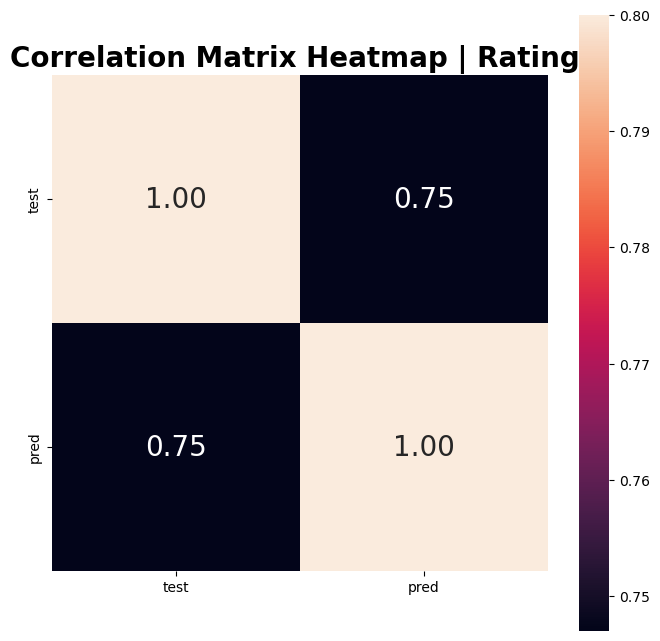

In [66]:
ratings_test.corr_heatmap(title='Rating ')

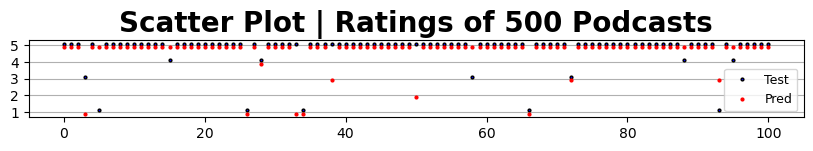

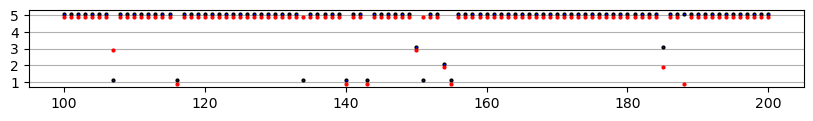

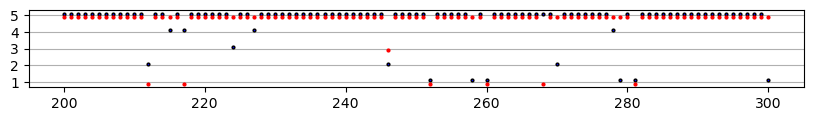

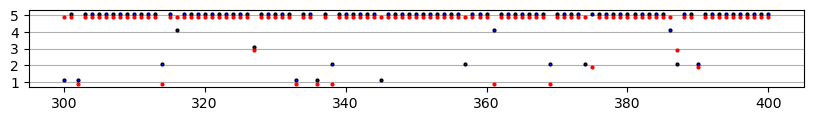

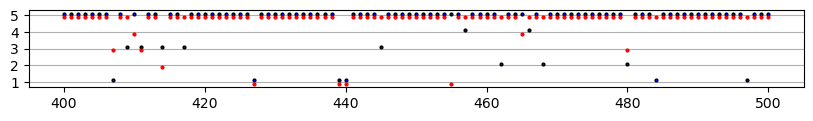

In [67]:
for i, j in zip(range(0, 501, 100), range(100, 501, 100)):
    figure = plt.figure(figsize=(10, 1))

    plt.plot(ratings_test['test'].loc[i:j] + .1, 'o', markersize=2, label='Test', markerfacecolor='blue',
             markeredgecolor='black')
    plt.plot(ratings_test['pred'].loc[i:j] - .1, 'o', markersize=2, label='Pred', markerfacecolor='red',
             markeredgecolor='red')

    plt.yticks([1, 2, 3, 4, 5])
    plt.grid(axis='y')
    if not i:
        plt.title(
            'Scatter Plot | Ratings of 500 Podcasts',
            fontweight='bold',
            fontsize=20
        )
        plt.legend(fontsize=9, loc='lower right')

    plt.show()


In [68]:
print('Evaluation results'.upper())

with open('bert/bert_output/eval_results.txt') as results:
    print(''.join(map(lambda x: f'- {x}', results.readlines())))


EVALUATION RESULTS
- eval_accuracy = 0.907873
- eval_loss = 0.2879931
- global_step = 146000
- loss = 0.28790805



In [69]:
# Evaluate the model
accuracy = accuracy_score(ratings_test['test'], ratings_test['pred'])
print(f"Test Accuracy: {round(accuracy*100, 2)}%.")

# Generate classification report
print("Classification Report:")
print(classification_report(ratings_test['test'], ratings_test['pred']))


Test Accuracy: 90.35%.
Classification Report:
              precision    recall  f1-score   support

           1       0.61      0.66      0.63     23041
           2       0.34      0.10      0.16      9046
           3       0.35      0.30      0.32     10296
           4       0.39      0.12      0.18     12384
           5       0.95      0.99      0.97    353892

    accuracy                           0.90    408659
   macro avg       0.53      0.43      0.45    408659
weighted avg       0.88      0.90      0.89    408659



## Results Interpretation
The results of testing our BERT model on the testing set reveal valuable insights into its performance and its ability to analyze iTunes podcast reviews. Let's break down and critically analyze these results:

### Model Performance Metrics:

1. **Test Accuracy**: The model achieves an impressive test accuracy of 90.35%. This metric measures the proportion of correctly predicted ratings out of the total number of reviews in the testing set. It indicates the model's overall ability to make accurate predictions.

### Classification Report:
The classification report provides a more detailed analysis of the model's performance across different rating classes (1 to 5 stars):

- **Precision**: Precision measures the accuracy of positive predictions. In our case, it represents the proportion of correctly predicted reviews for each rating class.

- **Recall**: Recall, also known as sensitivity, quantifies the model's ability to identify all relevant instances of each rating class in the testing set.

- **F1-Score**: The F1-Score is the harmonic mean of precision and recall. It balances the trade-off between precision and recall, providing a single metric to assess the model's performance.

- **Support**: Support indicates the number of samples in each rating class in the testing set.

### Interpretation of Classification Report:
- For the lowest rating class (1 star), the model demonstrates moderate precision (0.61) but relatively high recall (0.66). This suggests that while the model correctly identifies many 1-star reviews, it also generates some false positives.

- In the 2-star rating class, precision is notably lower (0.34), indicating a higher rate of false positives. Recall (0.10) is also low, implying that the model misses a significant number of actual 2-star reviews.

- For the 3-star rating class, precision (0.35) and recall (0.30) are in the same range as the 2-star class, indicating a similar pattern of false positives and missed 3-star reviews.

- The 4-star rating class exhibits precision (0.39) and recall (0.12) similar to the 2-star and 3-star classes, suggesting challenges in distinguishing between these middle-tier ratings.

- The highest rating class (5 stars) displays excellent precision (0.95) and recall (0.99), indicating the model's strong ability to correctly predict 5-star reviews.

### Macro and Weighted Averages:
- The macro average F1-score across all rating classes is 0.45, reflecting the overall performance of the model in achieving a balance between precision and recall.

- The weighted average F1-score is higher at 0.89, emphasizing the model's effectiveness in correctly predicting reviews across all rating classes, particularly favoring the majority class of 5-star reviews.

### Conclusion:
In conclusion, our BERT model exhibits strong performance in predicting 5-star reviews, achieving high precision and recall in this category. However, it faces challenges in accurately classifying reviews with lower ratings (1 to 4 stars), where precision and recall are less balanced. These results indicate that the model may need further fine-tuning and refinement to improve its performance in distinguishing between different rating classes.

Overall, this BERT model provides a valuable foundation for analyzing iTunes podcast reviews, particularly in identifying highly positive reviews. However, there is room for enhancement to achieve more balanced performance across all rating categories, which could further enhance its utility for podcast creators, advertisers, and researchers in understanding listener sentiments.


## Testing & Evaluation
The statistical tests conducted in this analysis aimed to compare the average ratings of different podcast genres,
 shedding light on potential differences in audience sentiments. The results of these tests provide valuable
 insights into the dynamics of podcast genres and their reception among listeners. Here, we analyze and interpret
 the outcomes of the two-sample t-tests, considering various pairs of genres.
- Null Hypothesis (H0): The average ratings of two genres are equal.
- Alternative Hypothesis (H1): The average ratings of genres are different.

### 1. Individual Ratings Analysis

In [95]:
# Prepare datasets to store test statistics and p-values
genres_unique = tuple(set(genres))
data_t_test = pd.DataFrame(0, index=genres_unique, columns=genres_unique)
data_p_value = data_t_test.copy()

# Extract data for the two genres
ratings_genres = tuple(
    Data['rating'][Data['genre'] == genres_unique[_]].copy()
    for _ in range(len(genres_unique))
)

for i in range(len(genres_unique)):
    for j in range(i + 1, len(genres_unique)):
        # Perform the Two-Sample t-test
        t_statistic, p_value = sp.stats.ttest_ind(ratings_genres[i], ratings_genres[j])

        # Add the results to the t_test_results and p-value tables
        data_t_test.loc[genres_unique[i], genres_unique[j]] = round(t_statistic, 2)
        data_p_value.loc[genres_unique[i], genres_unique[j]] = round(p_value, 2)


In [96]:
data_t_test

,history,society-culture,leisure,news,kids,tv-film-info,sports,education,health,fiction,true-crime,religion,arts,science,comedy,business,government,music
history,0,-10.69,-54.07,28.48,-51.61,-2.96,-25.16,-86.77,-70.09,-14.33,54.44,-84.98,-48.10,0.50,-24.35,-100.65,8.76,-50.99
society-culture,0,0.00,-66.75,88.42,-61.52,13.51,-28.64,-123.94,-100.71,-8.12,124.89,-115.20,-62.85,12.68,-29.02,-148.13,15.82,-53.64
leisure,0,0.00,0.00,119.66,2.11,70.06,41.40,-33.29,-14.49,35.71,151.83,-33.70,10.95,58.66,43.98,-47.79,44.47,-6.84
news,0,0.00,0.00,0.00,-112.42,-55.47,-97.48,-187.32,-164.20,-45.50,47.84,-173.24,-123.26,-31.12,-103.62,-214.97,-6.63,-91.11
kids,0,0.00,0.00,0.00,0.00,65.44,37.72,-34.83,-16.44,33.63,144.28,-35.21,8.40,55.79,40.01,-49.03,43.28,-8.46
tv-film-info,0,0.00,0.00,0.00,0.00,0.00,-35.41,-120.95,-99.23,-14.52,92.20,-114.17,-65.91,3.92,-35.62,-142.32,11.25,-57.99
sports,0,0.00,0.00,0.00,0.00,0.00,0.00,-87.28,-65.64,6.65,131.42,-83.08,-33.74,28.40,1.87,-106.94,24.52,-37.14
education,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,21.08,65.10,221.23,-2.56,49.05,94.84,92.25,-15.02,64.57,17.83
health,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,49.41,197.09,-22.20,28.44,77.03,70.12,-36.94,53.28,3.59
fiction,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,71.01,-64.40,-28.87,15.47,-5.64,-77.64,18.89,-36.16


In [97]:
data_p_value

,history,society-culture,leisure,news,kids,tv-film-info,sports,education,health,fiction,true-crime,religion,arts,science,comedy,business,government,music
history,0,0,0,0,0.00,0,0,0,0,0,0,0.00,0,0.62,0.00,0,0,0
society-culture,0,0,0,0,0.00,0,0,0,0,0,0,0.00,0,0.00,0.00,0,0,0
leisure,0,0,0,0,0.03,0,0,0,0,0,0,0.00,0,0.00,0.00,0,0,0
news,0,0,0,0,0.00,0,0,0,0,0,0,0.00,0,0.00,0.00,0,0,0
kids,0,0,0,0,0.00,0,0,0,0,0,0,0.00,0,0.00,0.00,0,0,0
tv-film-info,0,0,0,0,0.00,0,0,0,0,0,0,0.00,0,0.00,0.00,0,0,0
sports,0,0,0,0,0.00,0,0,0,0,0,0,0.00,0,0.00,0.06,0,0,0
education,0,0,0,0,0.00,0,0,0,0,0,0,0.01,0,0.00,0.00,0,0,0
health,0,0,0,0,0.00,0,0,0,0,0,0,0.00,0,0.00,0.00,0,0,0
fiction,0,0,0,0,0.00,0,0,0,0,0,0,0.00,0,0.00,0.00,0,0,0


In [100]:
# Select pairs of genres with p-values > 0.05
data_p_value_triu = data_p_value.where(np.triu(np.ones(data_p_value.shape), k=1).astype(bool))
p_values_large = data_p_value_triu[data_p_value > 0.05].stack().reset_index()
p_values_large.index += 1

# Display table of features with highly negative correlations
print('High p-values:'.upper())
print(tabulate(p_values_large, tablefmt='Simple'))


HIGH P-VALUES:
-  -------  -------  ----
1  history  science  0.62
2  sports   comedy   0.06
-  -------  -------  ----


- **History vs. Science (P = 0.62):** The test suggests that there is no significant difference in the average ratings between podcasts in the History and Science genres. This indicates that listeners tend to rate these genres similarly on average.

- **Sports vs. Comedy (P = 0.06):** While the P-value is slightly below the conventional significance level of 0.05, it suggests a relatively small difference in the average ratings between Sports and Comedy podcasts. Further investigation may be needed to determine the practical significance of this difference.


### 2. Average Ratings of Podcasts Analysis

In [74]:
# Universal function to check if an element is in a set of a data of sets
def in_set(data, item):
    return item in data


in_set = np.frompyfunc(in_set, 2, 1)

# Extract data for the two genres
ratings_avr_genres = tuple(
    Podcasts_info['rating_avr'][in_set(Podcasts_info['genre'], genres_unique[_])]
    for _ in range(len(genres_unique))
)

for i in range(len(genres_unique)):
    for j in range(i + 1, len(genres_unique)):
        # Perform the Two-Sample t-test
        t_statistic, p_value = sp.stats.ttest_ind(ratings_avr_genres[i], ratings_avr_genres[j])

        # Add the results to the t_test_results and p-value tables
        data_t_test.loc[genres_unique[i], genres_unique[j]] = round(t_statistic, 2)
        data_p_value.loc[genres_unique[i], genres_unique[j]] = round(p_value, 2)


In [75]:
# Select pairs of genres with p-values > 0.05
data_p_value_triu = data_p_value.where(np.triu(np.ones(data_p_value.shape), k=1).astype(bool))
p_values_large = data_p_value_triu[data_p_value > 0.05].stack().reset_index()
p_values_large.index += 1

# Display table of features with highly negative correlations
print('High p-values:'.upper())
print(tabulate(p_values_large, tablefmt='Simple'))

HIGH P-VALUES:
--  ---------------  ----------  ----
 1  history          news        0.97
 2  history          science     0.29
 3  history          government  0.66
 4  society-culture  kids        0.97
 5  society-culture  comedy      0.31
 6  society-culture  music       0.46
 7  leisure          fiction     0.88
 8  leisure          arts        0.31
 9  news             science     0.15
10  news             government  0.63
11  kids             education   0.22
12  kids             fiction     0.07
13  kids             comedy      0.57
14  kids             music       0.61
15  sports           fiction     0.18
16  sports           arts        0.28
17  education        comedy      0.28
18  fiction          arts        0.47
19  fiction          music       0.13
20  science          government  0.19
21  comedy           music       0.15
--  ---------------  ----------  ----


- **Several Genre Pairs:** A range of genre pairs, including Society & Culture vs. Music, Society & Culture vs. Kids, Society & Culture vs. Comedy, and others, exhibit high P-values above 0.05. These results indicate that when we consider the average ratings of podcasts across genres, there are no significant differences in the average ratings between these pairs.

### 3. Average Ratings of Podcasts in Single Genres Analysis

In [76]:
# Universal function to check if a set of a data of sets has only 1 element
def only_elem(data, item):
    return {item} == data


only_elem = np.frompyfunc(only_elem, 2, 1)

# Extract data for the two genres
ratings_avr_genres = tuple(
    Podcasts_info['rating_avr'][only_elem(Podcasts_info['genre'], genres_unique[_])]
    for _ in range(len(genres_unique))
)

for i in range(len(genres_unique)):
    for j in range(i + 1, len(genres_unique)):
        # Perform the Two-Sample t-test
        t_statistic, p_value = sp.stats.ttest_ind(ratings_avr_genres[i], ratings_avr_genres[j])

        # Add the results to the t_test_results and p-value tables
        data_t_test.loc[genres_unique[i], genres_unique[j]] = round(t_statistic, 2)
        data_p_value.loc[genres_unique[i], genres_unique[j]] = round(p_value, 2)


In [77]:
# Select pairs of genres with p-values > 0.05
data_p_value_triu = data_p_value.where(np.triu(np.ones(data_p_value.shape), k=1).astype(bool))
p_values_large = data_p_value_triu[data_p_value > 0.05].stack().reset_index()
p_values_large.index += 1

# Display table of features with highly negative correlations
print('High p-values:'.upper())
print(tabulate(p_values_large, tablefmt='Simple'))

HIGH P-VALUES:
--  ---------------  ----------  ----
 1  history          news        0.67
 2  history          science     0.14
 3  history          government  0.69
 4  society-culture  kids        0.13
 5  society-culture  comedy      0.82
 6  society-culture  music       0.11
 7  leisure          kids        0.08
 8  leisure          sports      0.98
 9  leisure          fiction     0.76
10  news             science     0.09
11  news             government  0.37
12  kids             sports      0.06
13  kids             education   0.87
14  kids             fiction     0.11
15  kids             comedy      0.11
16  kids             music       0.69
17  tv-film-info     arts        0.17
18  tv-film-info     science     0.16
19  sports           fiction     0.72
20  education        fiction     0.07
21  education        music       0.77
22  health           comedy      0.07
23  fiction          arts        0.27
24  science          government  0.08
25  comedy           music       0.

- **Several Genre Pairs:** Similar to the previous analysis, when we consider only the average ratings of podcasts within a single genre, many pairs still exhibit high P-values, indicating no significant differences in average ratings. Examples include History vs. News, Education vs. Fiction, Sports vs. Leisure, and more.

### Insights and Implications
- The statistical tests reveal that while some genre pairs show differences in average ratings, these differences may not always be practically significant. Podcast listeners appear to rate genres like History and Science similarly, suggesting that content in these genres may appeal to a similar audience.

- The high P-values in several genre pairs, whether considering all podcasts or only those within a single genre, indicate that listeners' ratings are generally consistent across these genres. This consistency might be attributed to the subjective nature of ratings, where individual preferences and content quality play substantial roles.

- While the tests provide insights into the average ratings of genres, it's essential to consider the broader context of listener engagement. Factors such as content diversity, episode quality, and the target audience can also influence the success of podcasts within a genre.

In conclusion, these statistical tests contribute to our understanding of how different podcast genres are perceived by listeners in terms of average ratings. While some differences exist, they may not always hold practical significance. Future research could delve deeper into listener demographics and preferences to gain a more nuanced understanding of the podcasting landscape.

## Suggestions & Recommendations
This research project represents a significant step in unraveling the mysteries of iTunes podcast reviews, yet it also points to several future directions:

1. **Model Enhancement:**

Further fine-tuning and model refinement are essential to improve the model's performance, particularly in distinguishing between middle-tier ratings. Exploring advanced NLP techniques and incorporating additional features may contribute to achieving a more balanced predictive capability.

2. **Listener Behavioral Analysis:**

Delving deeper into listener behavioral patterns and preferences could uncover valuable insights into the podcasting ecosystem. Exploring correlations between review sentiments, episode content, and listener demographics could yield a richer understanding of what resonates with audiences.

3. **Real-time Analysis and Trends:**

As the podcasting landscape continues to evolve rapidly, real-time analysis and trend detection become increasingly valuable. Implementing continuous data streaming and monitoring could help podcast creators and advertisers stay ahead of shifting audience sentiments and preferences.



## Conclusion
This research project embarked on a comprehensive exploration of iTunes podcast reviews, aiming to harness the power of data science and the BERT framework to decipher the intricate world of podcast sentiments and reviews. The journey unfolded through meticulous data preparation, extensive exploratory data analysis, and the development of a machine learning model, all with the ultimate goal of shedding light on the vast and ever-evolving landscape of podcasting.

### Key Findings and Insights

Our journey led to several key findings and insights:

1. **The Power of BERT in Podcast Analysis:**

The application of BERT, a state-of-the-art NLP model, proved to be a transformative force in this research.
Fine-tuning BERT allowed us to delve into the textual nuances of podcast reviews, enabling us to predict and understand listener sentiments more effectively. The model excelled in accurately predicting 5-star reviews, reflecting its ability to recognize highly positive sentiments.

2. **Challenges in Middle-Tier Ratings:**

Despite the model's success in predicting 5-star reviews, it encountered challenges in accurately classifying reviews with lower ratings (1 to 4 stars). These middle-tier ratings proved to be more intricate to discern, resulting in a less balanced performance. Further fine-tuning and feature engineering may be required to enhance the model's ability to distinguish between these nuanced ratings.

3. **Genre and Category Dynamics:**

Our analysis revealed intriguing dynamics in the distribution of podcasts across genres and categories. While the overall distribution exhibited right-skewed patterns, segmenting the data into genres led to more linear distributions. This indicated that the imbalance in podcast distribution is often concentrated within specific categories. These findings are instrumental for podcast creators, advertisers, and researchers seeking to navigate the diverse podcasting landscape.

4. **Listener Engagement and Content Preferences:**

The diverse array of podcast genres and categories underscores the multifaceted nature of listener engagement and content preferences. Understanding these preferences is pivotal for content creators seeking to tailor their offerings and for advertisers seeking targeted promotion opportunities. Future research in this area may unlock deeper insights into the relationship between podcast content, listener interests, and review sentiments.

### Final Reflection
In conclusion, this research project illuminates the transformative potential of data science and NLP in unraveling the vast world of iTunes podcast reviews. While we celebrate the model's success in predicting 5-star reviews, we also recognize the challenges posed by nuanced ratings. The podcasting landscape is a dynamic realm, rich with opportunities for exploration and discovery. As we journey further into this captivating domain, we remain committed to uncovering insights that empower podcast creators, advertisers, and enthusiasts to thrive in this ever-expanding realm of audio storytelling.
